
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

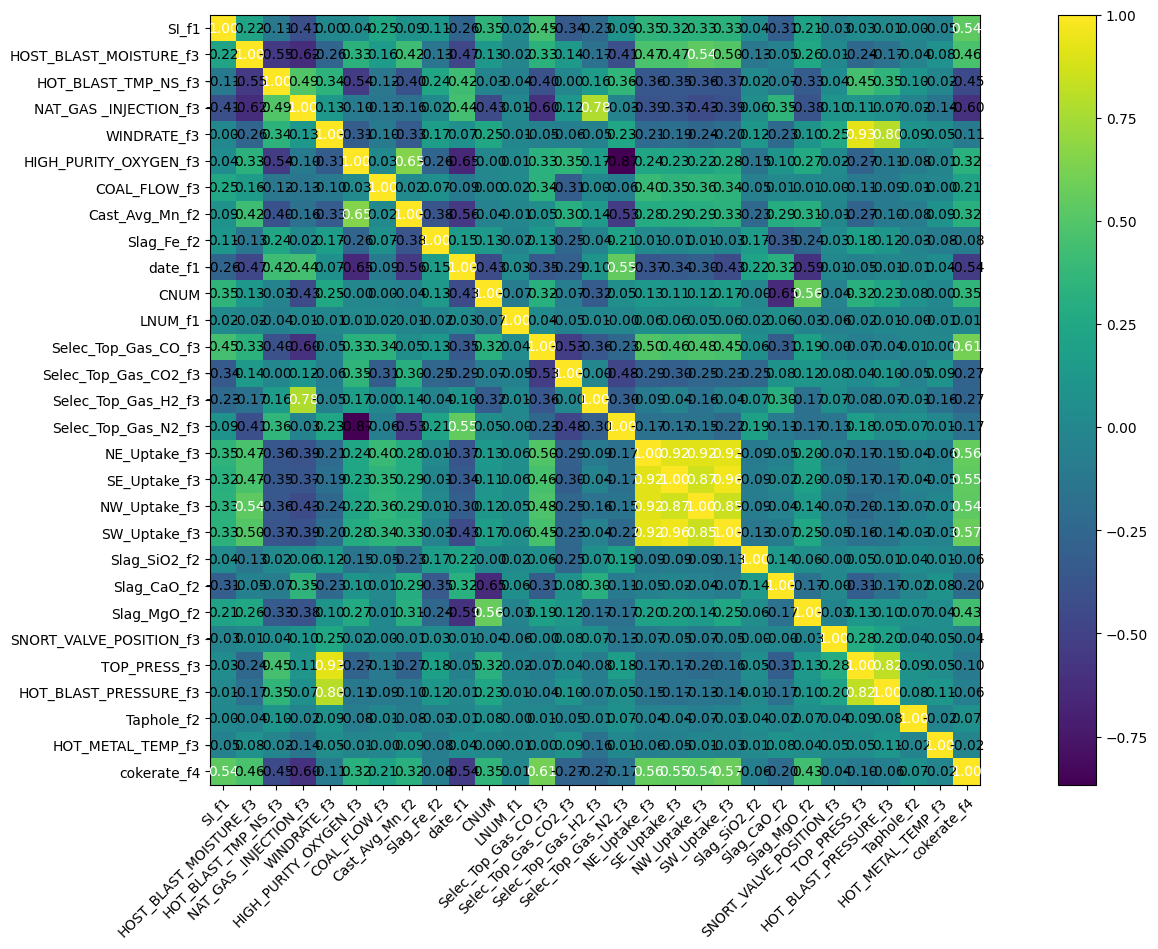

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

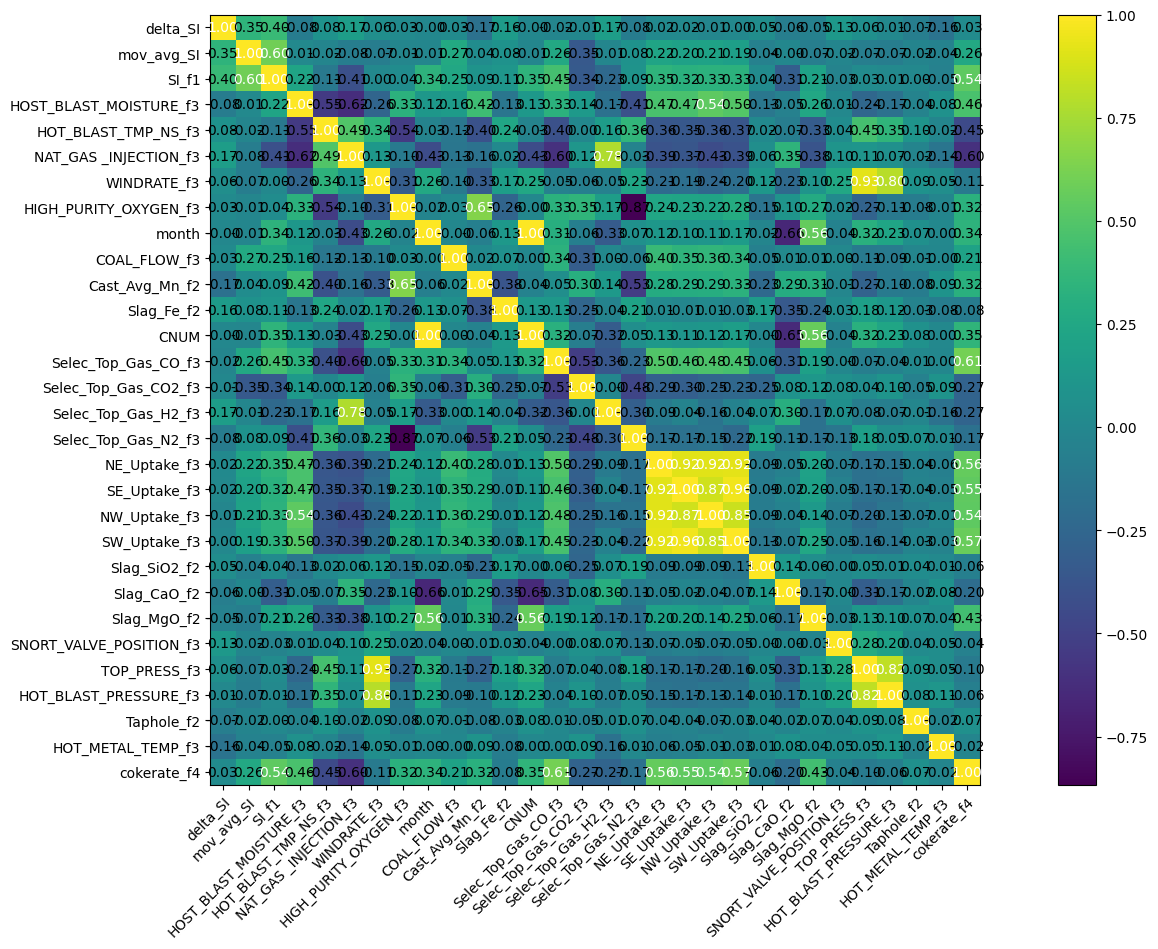

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.211589
Loss_SI: 1.566557765007019 Loss_all: 1.2132779359817505
===
[200] Train Loss: 0.057104
Loss_SI: 0.47069406509399414 Loss_all: 0.3746168613433838
===
[400] Train Loss: 0.032992
Loss_SI: 0.35040122270584106 Loss_all: 0.34680843353271484
===
[600] Train Loss: 0.024234
Loss_SI: 0.3924415409564972 Loss_all: 0.32428881525993347
===
[800] Train Loss: 0.023721
Loss_SI: 0.4105249345302582 Loss_all: 0.36069589853286743
===


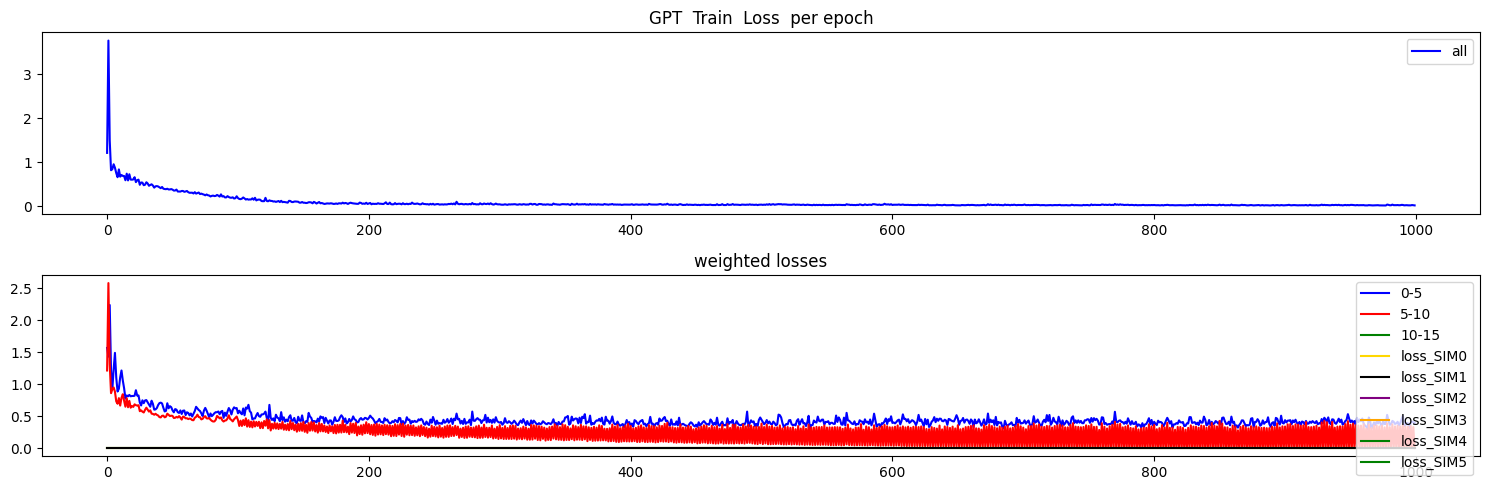

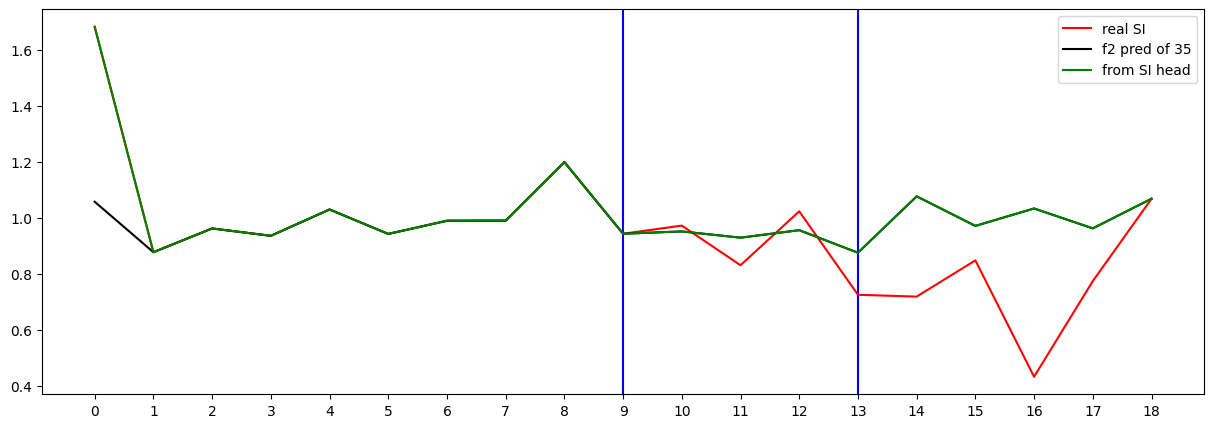

Testing R**2 - (all) - (no inputs):  0.9884718392822719
Testing R**2 - (f2) - SI full (no inputs):  0.06393394112979045
Testing R**2 - SI head only (no inputs):  0.06393394112979045
0 ...index R**2 (no inputs):  -0.003727185909542019
1 ...index R**2 (no inputs):  0.06674925151578559
2 ...index R**2 (no inputs):  0.06393394112979045
3 ...index R**2 (no inputs):  -0.14940773118286188
4 ...index R**2 (no inputs):  -2.695642801590231
5 ...index R**2 (no inputs):  -0.3136634041553752
6 ...index R**2 (no inputs):  -0.19725024350680398
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.13047844626571936
10 ...index R**2 (no inputs):  0.3890481542992521
11 ...index R**2 (no inputs):  -0.7255095676216559
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6929584988171775
16 ...index R**2 (no inputs):  0.17436195386299835
17 ...index R**2 (no inputs):  -12.9652

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.165831
Loss_SI: 1.1801050901412964 Loss_all: 1.2709335088729858
===
[200] Train Loss: 0.137941
Loss_SI: 0.5867713093757629 Loss_all: 0.4174443185329437
===
[400] Train Loss: 0.053176
Loss_SI: 0.4061838686466217 Loss_all: 0.3809560239315033
===
[600] Train Loss: 0.041137
Loss_SI: 0.4581301808357239 Loss_all: 0.40003782510757446
===
[800] Train Loss: 0.035060
Loss_SI: 0.4024279713630676 Loss_all: 0.3374849259853363
===


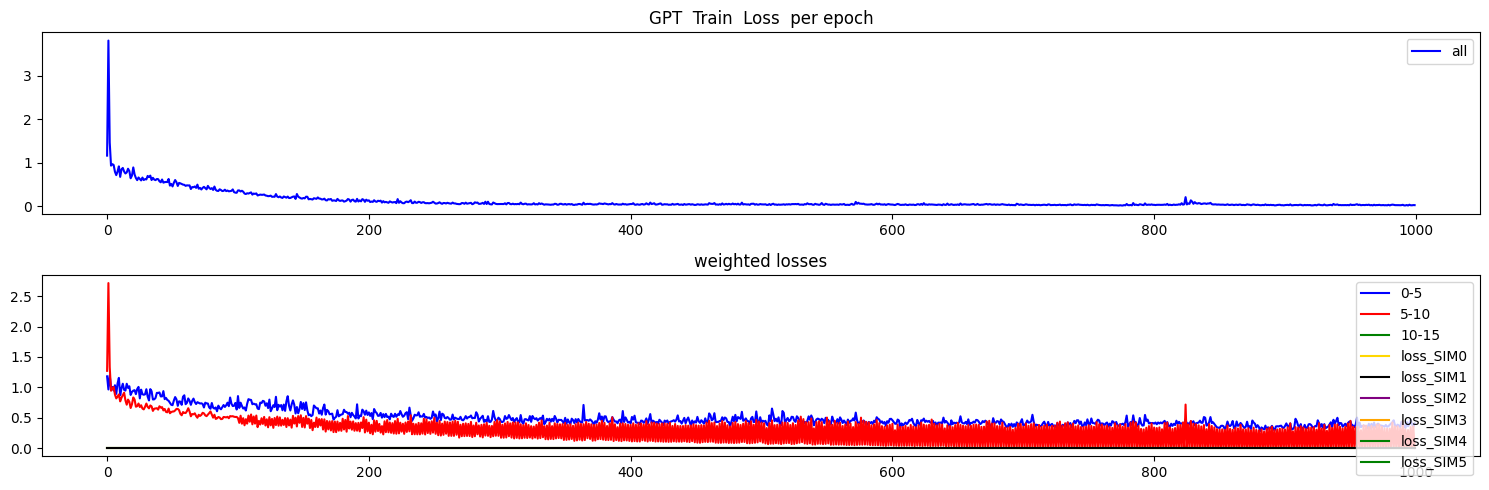

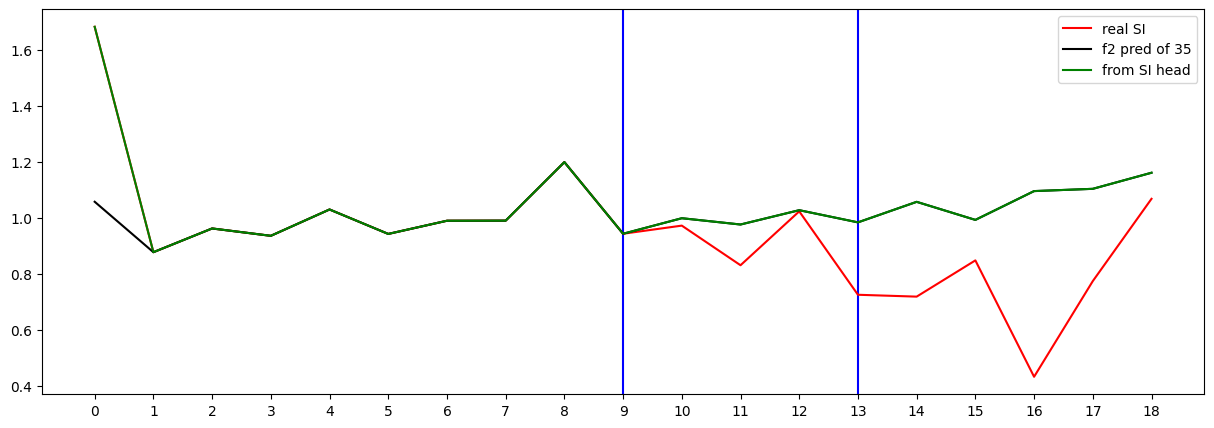

Testing R**2 - (all) - (no inputs):  0.9904843674563397
Testing R**2 - (f2) - SI full (no inputs):  0.03635214212878046
Testing R**2 - SI head only (no inputs):  0.03635214212878046
0 ...index R**2 (no inputs):  0.03729270736362911
1 ...index R**2 (no inputs):  0.040764320085952876
2 ...index R**2 (no inputs):  0.03635214212878046
3 ...index R**2 (no inputs):  -0.40935107926918013
4 ...index R**2 (no inputs):  -1.6661194383014646
5 ...index R**2 (no inputs):  -0.04992045762268815
6 ...index R**2 (no inputs):  -0.4472221048891629
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.36293632325876657
10 ...index R**2 (no inputs):  0.616949049177708
11 ...index R**2 (no inputs):  -4.00243446059893
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8635735389898862
16 ...index R**2 (no inputs):  -0.16951992124176685
17 ...index R**2 (no inputs):  -16.75191

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.181046
Loss_SI: 1.225918173789978 Loss_all: 1.1808557510375977
===
[200] Train Loss: 0.207557
Loss_SI: 0.5787522792816162 Loss_all: 0.4150797724723816
===
[400] Train Loss: 0.072910
Loss_SI: 0.5231109857559204 Loss_all: 0.36913931369781494
===
[600] Train Loss: 0.058610
Loss_SI: 0.45715761184692383 Loss_all: 0.2965352535247803
===
[800] Train Loss: 0.031464
Loss_SI: 0.3808688819408417 Loss_all: 0.32672804594039917
===


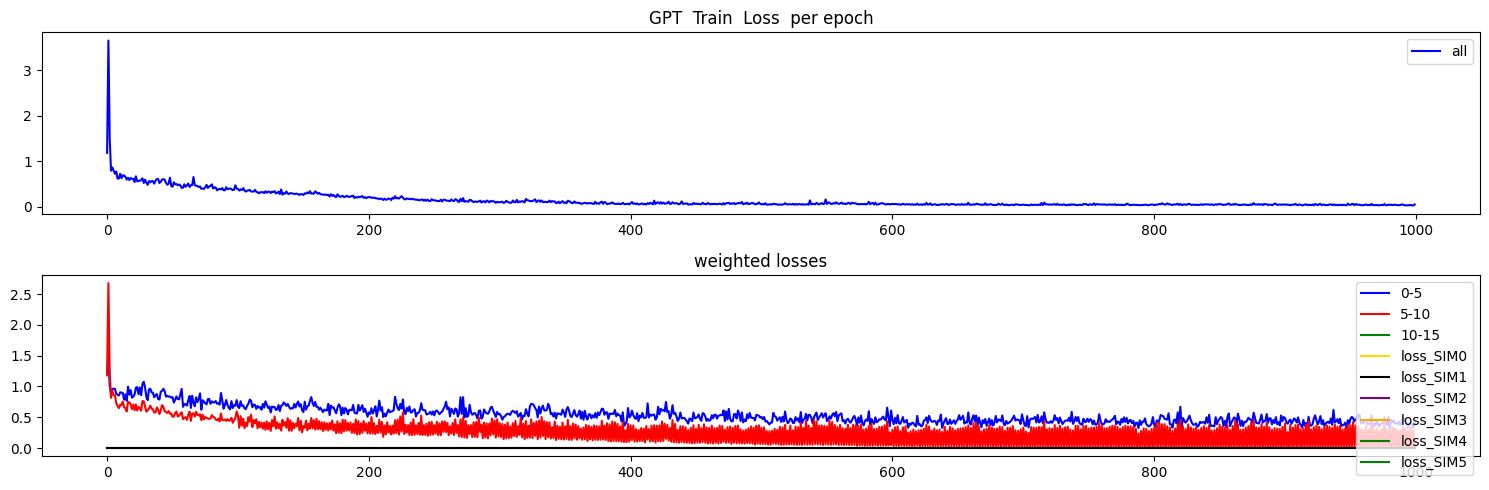

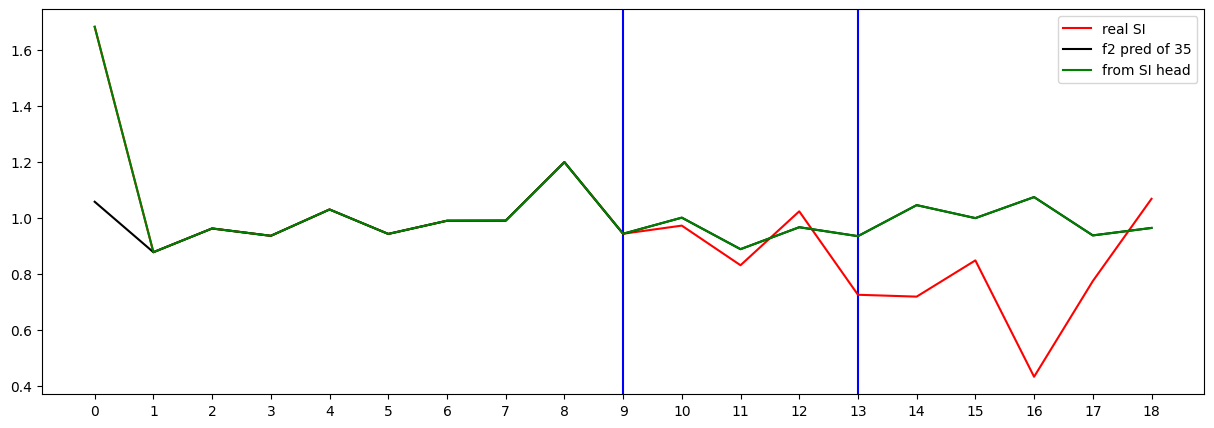

Testing R**2 - (all) - (no inputs):  0.9895655327968068
Testing R**2 - (f2) - SI full (no inputs):  -0.1814360581119583
Testing R**2 - SI head only (no inputs):  -0.1814360581119583
0 ...index R**2 (no inputs):  -0.1465787715997744
1 ...index R**2 (no inputs):  -0.3401472377932502
2 ...index R**2 (no inputs):  -0.1814360581119583
3 ...index R**2 (no inputs):  -0.33448374884812604
4 ...index R**2 (no inputs):  -8.541464558702977
5 ...index R**2 (no inputs):  -0.17401129434632767
6 ...index R**2 (no inputs):  -1.3502624355318495
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09660020671464498
10 ...index R**2 (no inputs):  0.4147486780638774
11 ...index R**2 (no inputs):  0.12557444198447376
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3274300859842061
16 ...index R**2 (no inputs):  0.0266264814517978
17 ...index R**2 (no inputs):  -90.694040

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.254851
Loss_SI: 1.67491614818573 Loss_all: 1.3814977407455444
===
[200] Train Loss: 0.224113
Loss_SI: 0.6153625845909119 Loss_all: 0.389879047870636
===
[400] Train Loss: 0.088257
Loss_SI: 0.45646458864212036 Loss_all: 0.3241212069988251
===
[600] Train Loss: 0.051913
Loss_SI: 0.40887442231178284 Loss_all: 0.2841164767742157
===
[800] Train Loss: 0.046311
Loss_SI: 0.38706499338150024 Loss_all: 0.3016093671321869
===


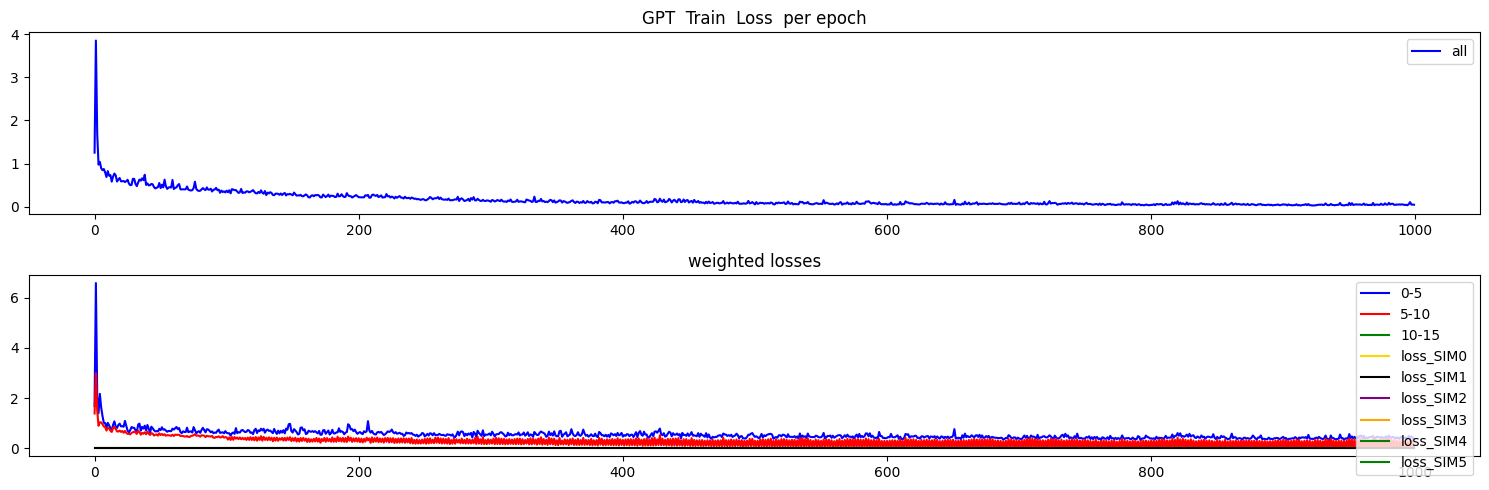

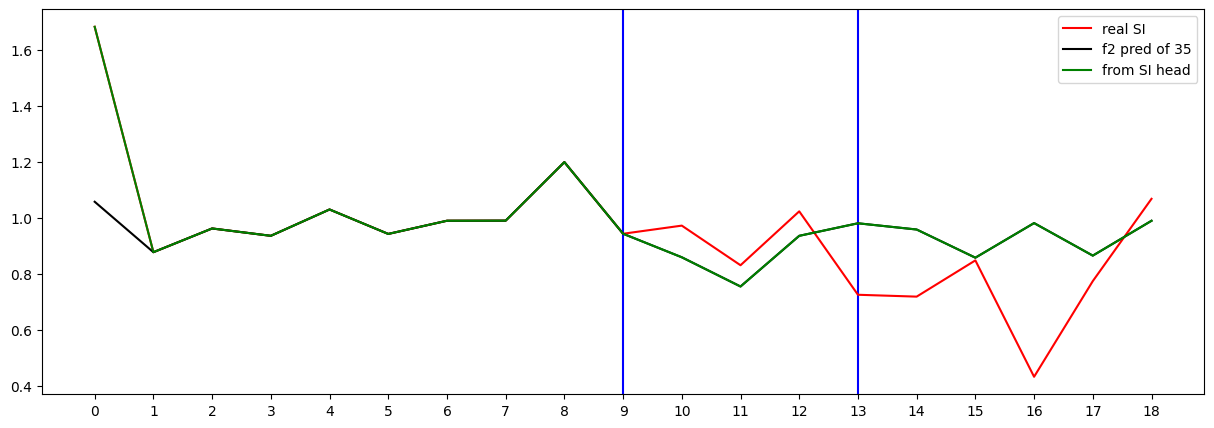

Testing R**2 - (all) - (no inputs):  0.984801933355096
Testing R**2 - (f2) - SI full (no inputs):  0.018725206660572646
Testing R**2 - SI head only (no inputs):  0.018725206660572646
0 ...index R**2 (no inputs):  -0.06884759706300803
1 ...index R**2 (no inputs):  -0.23901002507620772
2 ...index R**2 (no inputs):  0.018725206660572646
3 ...index R**2 (no inputs):  -0.5157709486949944
4 ...index R**2 (no inputs):  0.006513232927337631
5 ...index R**2 (no inputs):  -0.7890175183482866
6 ...index R**2 (no inputs):  -0.22345894146547085
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.3171490368026183
10 ...index R**2 (no inputs):  0.4442320522198735
11 ...index R**2 (no inputs):  -159.96112646104584
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.31565245829766875
16 ...index R**2 (no inputs):  -0.3469107480485527
17 ...index R**2 (no inputs):  -243.

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.160500
Loss_SI: 0.9587163925170898 Loss_all: 1.0584838390350342
===
[200] Train Loss: 0.069664
Loss_SI: 0.8539911508560181 Loss_all: 0.5018458962440491
===
[400] Train Loss: 0.036113
Loss_SI: 0.8544802665710449 Loss_all: 0.4587092697620392
===
[600] Train Loss: 0.037299
Loss_SI: 0.9830617904663086 Loss_all: 0.5583528876304626
===
[800] Train Loss: 0.022118
Loss_SI: 1.3451570272445679 Loss_all: 0.6266029477119446
===


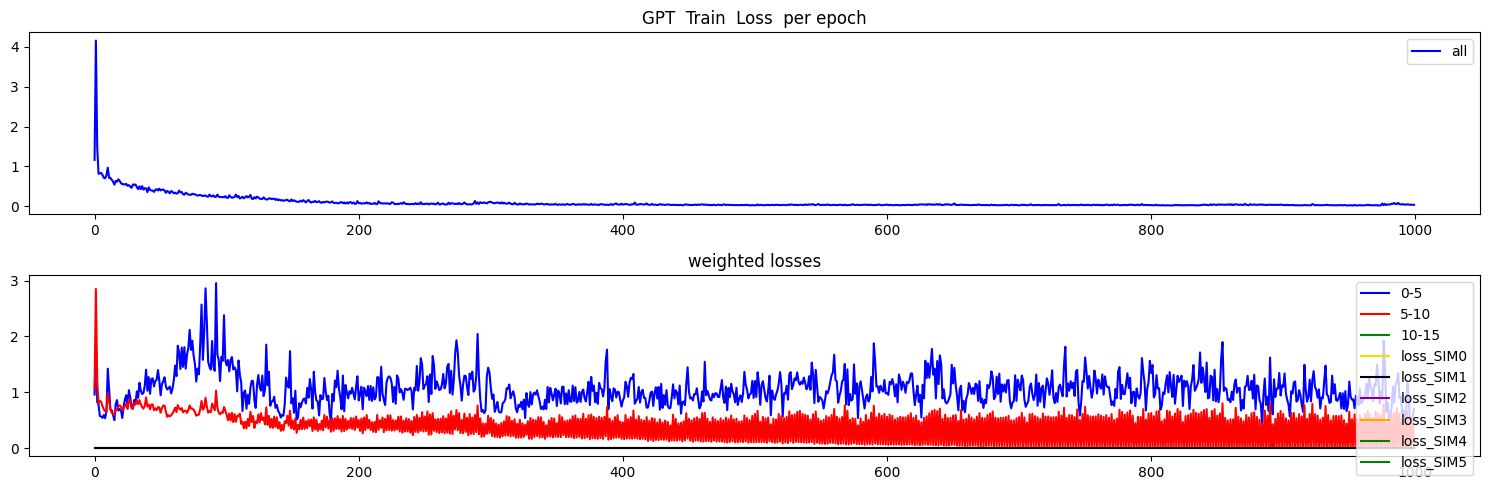

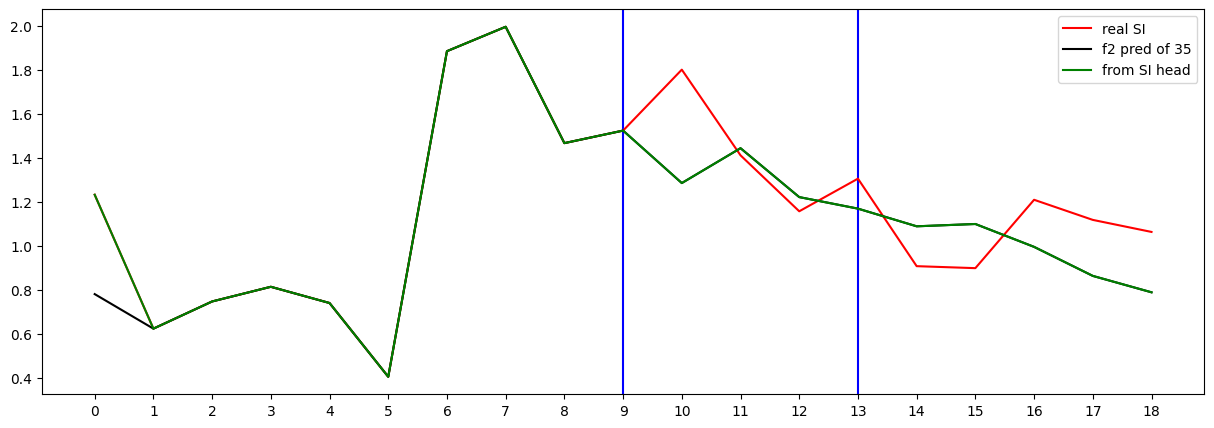

Testing R**2 - (all) - (no inputs):  0.601265804156459
Testing R**2 - (f2) - SI full (no inputs):  -1.0313171738056401
Testing R**2 - SI head only (no inputs):  -1.0313171738056401
0 ...index R**2 (no inputs):  -0.05947762145668056
1 ...index R**2 (no inputs):  -0.09791272658263939
2 ...index R**2 (no inputs):  -1.0313171738056401
3 ...index R**2 (no inputs):  -0.9957270009910073
4 ...index R**2 (no inputs):  -0.928175336055217
5 ...index R**2 (no inputs):  -0.5785628274710386
6 ...index R**2 (no inputs):  -10.390386426442888
7 ...index R**2 (no inputs):  -1.515411623928601
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5167618999053509
10 ...index R**2 (no inputs):  -0.6257547235144778
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.32822793430558095
16 ...index R**2 (no inputs):  0.3502435439778673
17 ...index R**2 (no inputs):  -141.923814

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.988319
Loss_SI: 0.8712150454521179 Loss_all: 1.0474809408187866
===
[200] Train Loss: 0.151157
Loss_SI: 0.6352483034133911 Loss_all: 0.3764835000038147
===
[400] Train Loss: 0.074668
Loss_SI: 0.5633699297904968 Loss_all: 0.3498503267765045
===
[600] Train Loss: 0.039845
Loss_SI: 0.30279889702796936 Loss_all: 0.2708273231983185
===
[800] Train Loss: 0.034550
Loss_SI: 0.37978726625442505 Loss_all: 0.2812192738056183
===


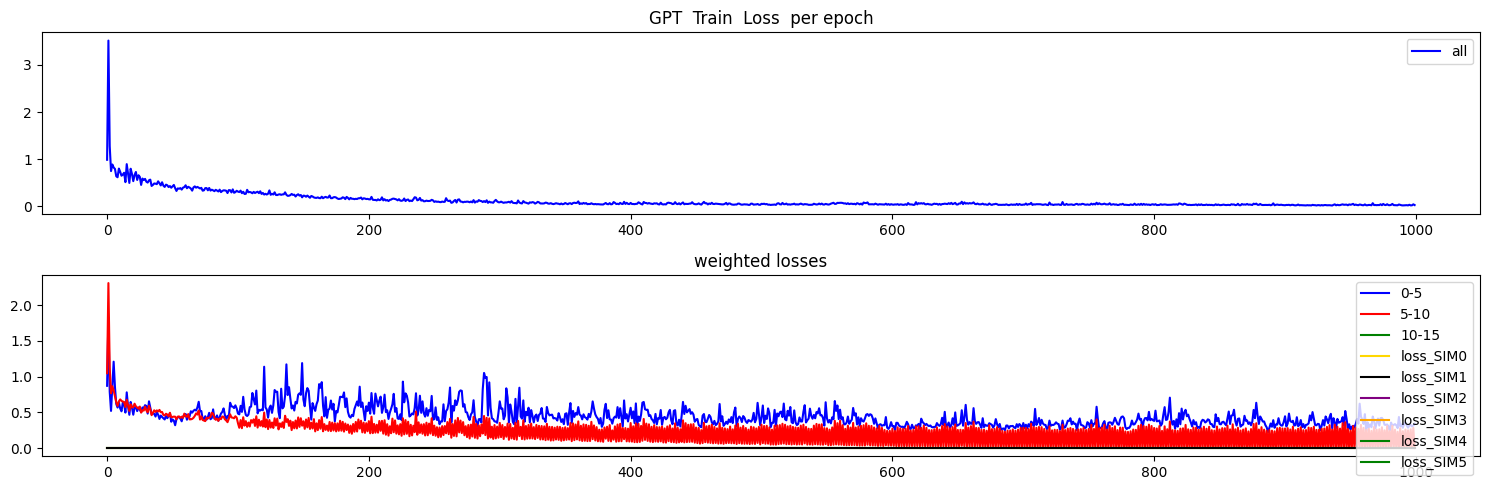

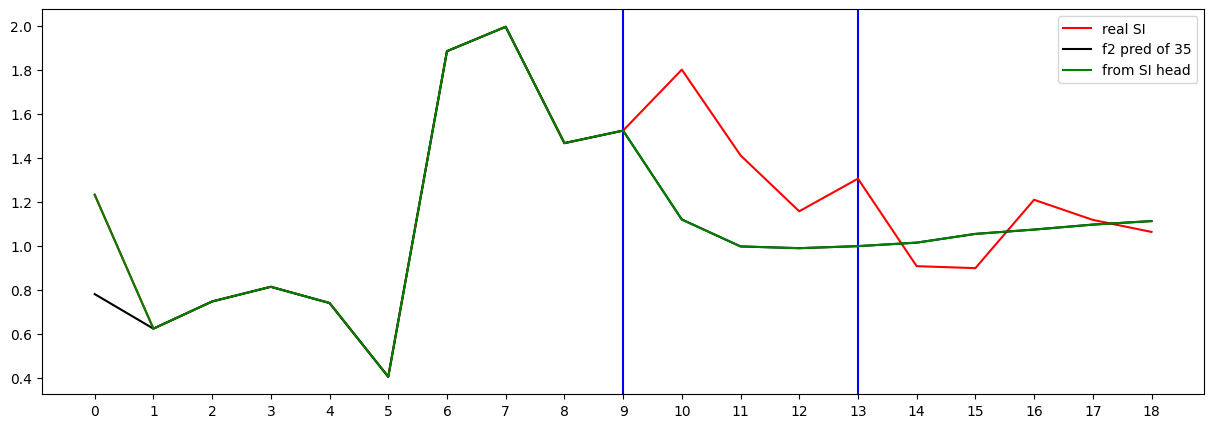

Testing R**2 - (all) - (no inputs):  0.6651658658593864
Testing R**2 - (f2) - SI full (no inputs):  -0.17412922920305185
Testing R**2 - SI head only (no inputs):  -0.17412922920305185
0 ...index R**2 (no inputs):  0.2704873040362432
1 ...index R**2 (no inputs):  0.28302155014945096
2 ...index R**2 (no inputs):  -0.17412922920305185
3 ...index R**2 (no inputs):  -0.06844855547898332
4 ...index R**2 (no inputs):  -0.824110732170763
5 ...index R**2 (no inputs):  -0.3224841811770238
6 ...index R**2 (no inputs):  -75.93814445105578
7 ...index R**2 (no inputs):  -1.2598078644451678
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2608727145933125
10 ...index R**2 (no inputs):  0.5243633975311168
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.14732983264466104
16 ...index R**2 (no inputs):  -0.10834288692094374
17 ...index R**2 (no inputs):  -2009.11

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.143822
Loss_SI: 1.6693004369735718 Loss_all: 1.1689926385879517
===
[200] Train Loss: 0.185937
Loss_SI: 0.2772810459136963 Loss_all: 0.2781372368335724
===
[400] Train Loss: 0.078380
Loss_SI: 0.2181076556444168 Loss_all: 0.22321709990501404
===
[600] Train Loss: 0.053022
Loss_SI: 0.26889583468437195 Loss_all: 0.2666182518005371
===
[800] Train Loss: 0.083980
Loss_SI: 0.3697662055492401 Loss_all: 0.2908949553966522
===


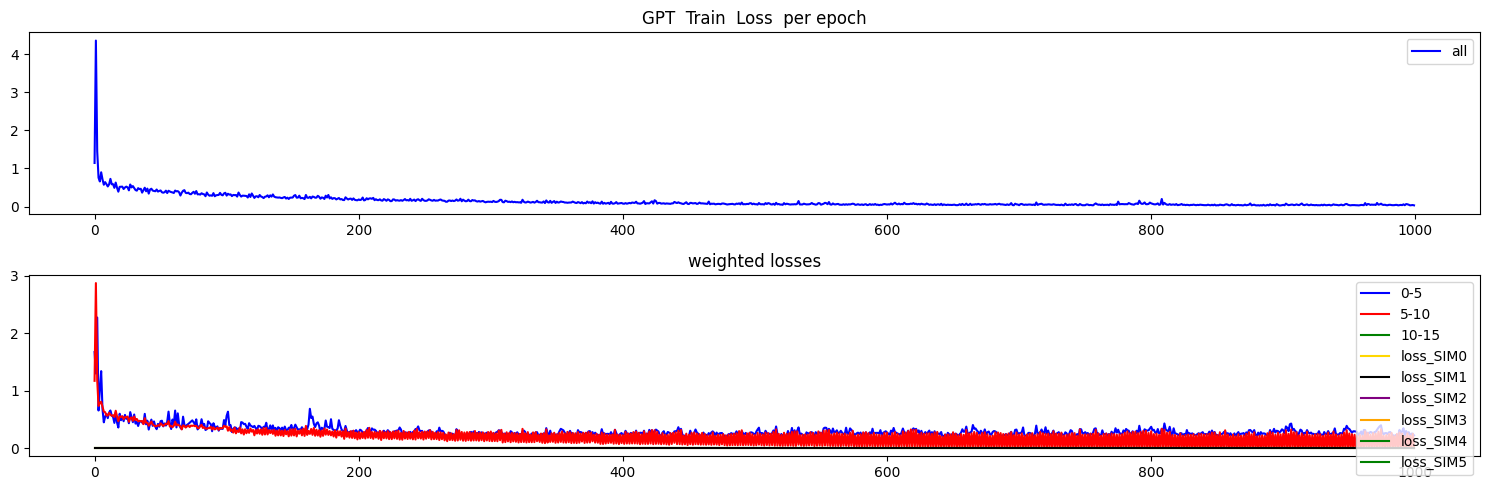

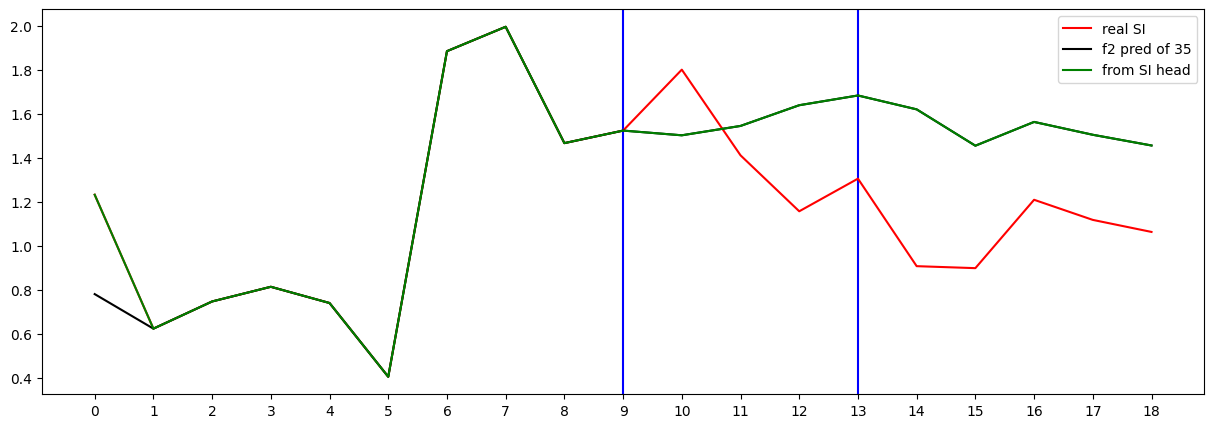

Testing R**2 - (all) - (no inputs):  0.42786020490128673
Testing R**2 - (f2) - SI full (no inputs):  -7.13616984211958
Testing R**2 - SI head only (no inputs):  -7.13616984211958
0 ...index R**2 (no inputs):  -0.4227845344390939
1 ...index R**2 (no inputs):  -0.42968230576660527
2 ...index R**2 (no inputs):  -7.13616984211958
3 ...index R**2 (no inputs):  -4.96136581522509
4 ...index R**2 (no inputs):  -35.2231961098131
5 ...index R**2 (no inputs):  -1.2572998687777739
6 ...index R**2 (no inputs):  -36.05578138699366
7 ...index R**2 (no inputs):  -0.2496610518292266
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6373375392035974
10 ...index R**2 (no inputs):  -2.121244467298617
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.00010381254551972141
16 ...index R**2 (no inputs):  -0.6583354607772807
17 ...index R**2 (no inputs):  -1566.84420259282

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.183114
Loss_SI: 1.3354159593582153 Loss_all: 1.3603907823562622
===
[200] Train Loss: 0.188366
Loss_SI: 0.33859801292419434 Loss_all: 0.2695402503013611
===
[400] Train Loss: 0.100659
Loss_SI: 0.24090389907360077 Loss_all: 0.2697123885154724
===
[600] Train Loss: 0.067642
Loss_SI: 0.27020010352134705 Loss_all: 0.2454688400030136
===
[800] Train Loss: 0.051941
Loss_SI: 0.24377135932445526 Loss_all: 0.2263697385787964
===


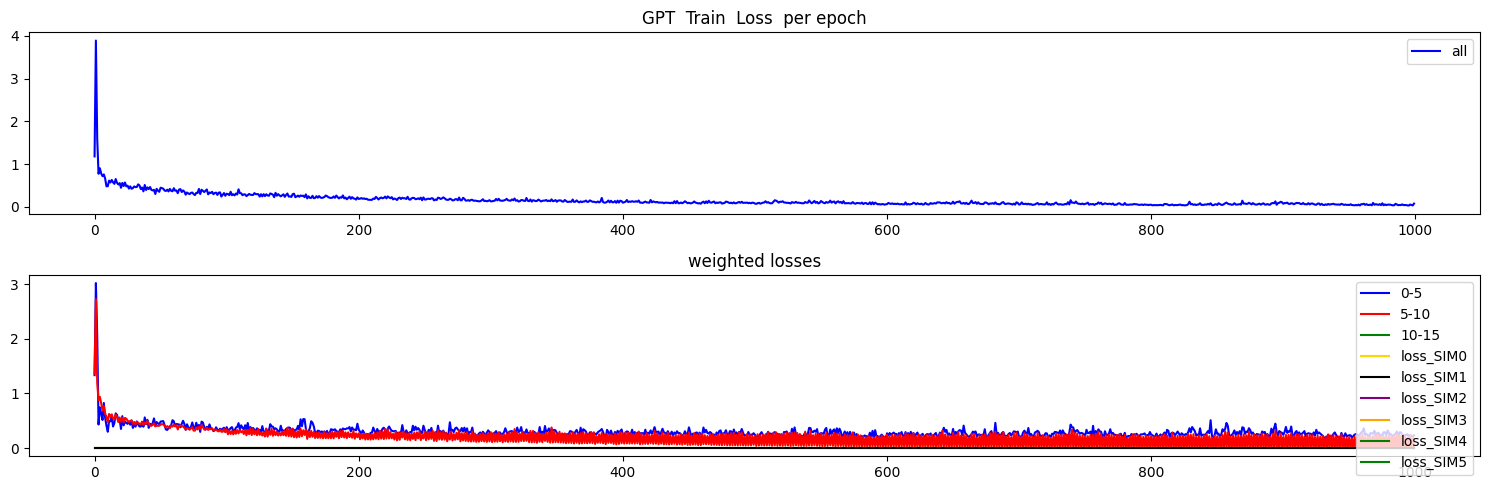

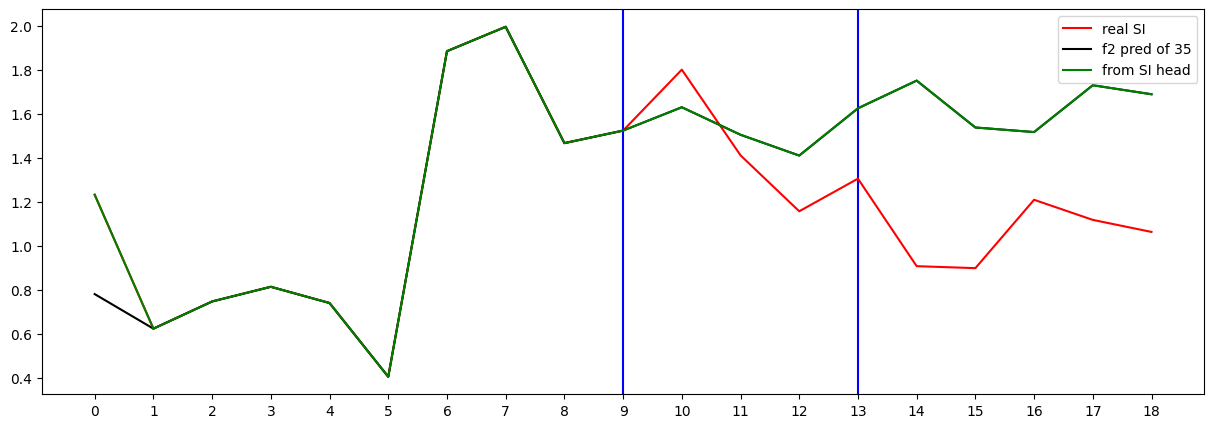

Testing R**2 - (all) - (no inputs):  0.37664262380829316
Testing R**2 - (f2) - SI full (no inputs):  -9.043899526820903
Testing R**2 - SI head only (no inputs):  -9.043899526820903
0 ...index R**2 (no inputs):  -0.7363938812625059
1 ...index R**2 (no inputs):  -0.6035173453120666
2 ...index R**2 (no inputs):  -9.043899526820903
3 ...index R**2 (no inputs):  -4.695808000927161
4 ...index R**2 (no inputs):  -35.664094270483325
5 ...index R**2 (no inputs):  -1.4594917861630954
6 ...index R**2 (no inputs):  -70.22045952734418
7 ...index R**2 (no inputs):  -0.362701074823929
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8094547179431115
10 ...index R**2 (no inputs):  -1.995316302531803
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.08780663994753501
16 ...index R**2 (no inputs):  -0.9127890858117984
17 ...index R**2 (no inputs):  -1276.141477897

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.238705
Loss_SI: 1.6642448902130127 Loss_all: 1.270703911781311
===
[200] Train Loss: 0.085735
Loss_SI: 0.3259560167789459 Loss_all: 0.3345389664173126
===
[400] Train Loss: 0.039657
Loss_SI: 0.3151809871196747 Loss_all: 0.33172473311424255
===
[600] Train Loss: 0.024105
Loss_SI: 0.3131973445415497 Loss_all: 0.2980519235134125
===
[800] Train Loss: 0.029829
Loss_SI: 0.41200992465019226 Loss_all: 0.35557031631469727
===


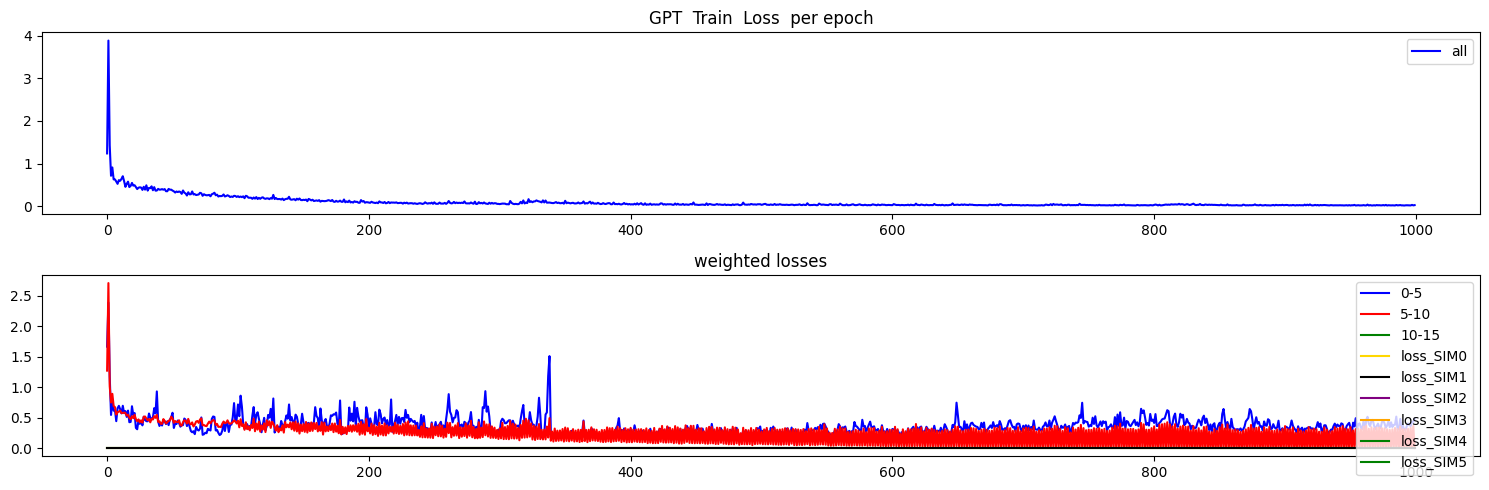

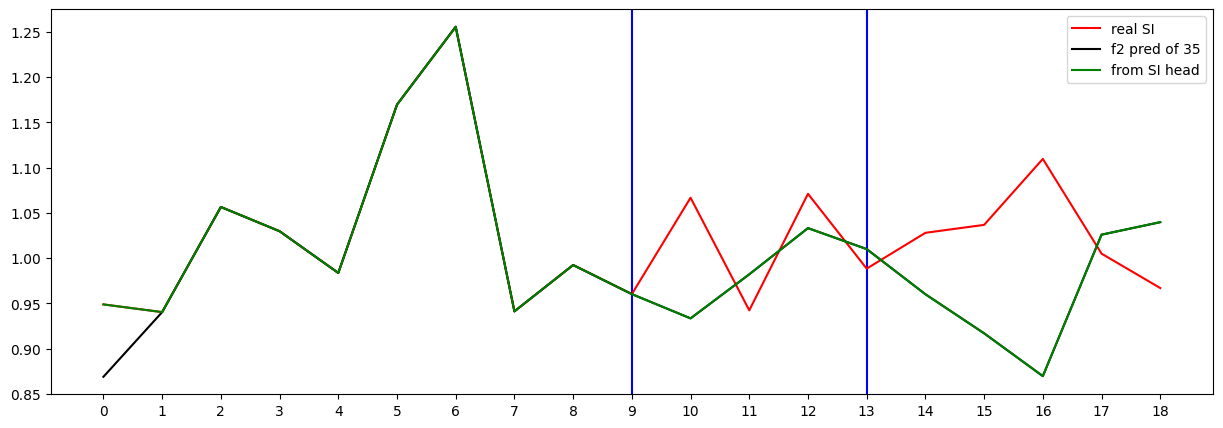

Testing R**2 - (all) - (no inputs):  0.9776048880822182
Testing R**2 - (f2) - SI full (no inputs):  -2.2888292387912563
Testing R**2 - SI head only (no inputs):  -2.2888292387912563
0 ...index R**2 (no inputs):  -0.7605564728971632
1 ...index R**2 (no inputs):  -2.2900899288076717
2 ...index R**2 (no inputs):  -2.2888292387912563
3 ...index R**2 (no inputs):  -232.02427873112308
4 ...index R**2 (no inputs):  -391.7028501183103
5 ...index R**2 (no inputs):  -5.4564037991131205
6 ...index R**2 (no inputs):  0.9626927600877199
7 ...index R**2 (no inputs):  0.5276802769784419
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2862272661749019
10 ...index R**2 (no inputs):  0.3751449151960774
11 ...index R**2 (no inputs):  0.1449913096756572
12 ...index R**2 (no inputs):  -0.12499996338800767
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.8520560896132814
16 ...index R**2 (no inputs):  -2.552262214939192
17 ...index R*

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.062792
Loss_SI: 1.132053017616272 Loss_all: 1.044815182685852
===
[200] Train Loss: 0.120297
Loss_SI: 0.31734147667884827 Loss_all: 0.31950125098228455
===
[400] Train Loss: 0.079220
Loss_SI: 0.2963729202747345 Loss_all: 0.3958331346511841
===
[600] Train Loss: 0.045778
Loss_SI: 0.24373674392700195 Loss_all: 0.29367637634277344
===
[800] Train Loss: 0.050266
Loss_SI: 0.2138802856206894 Loss_all: 0.26629188656806946
===


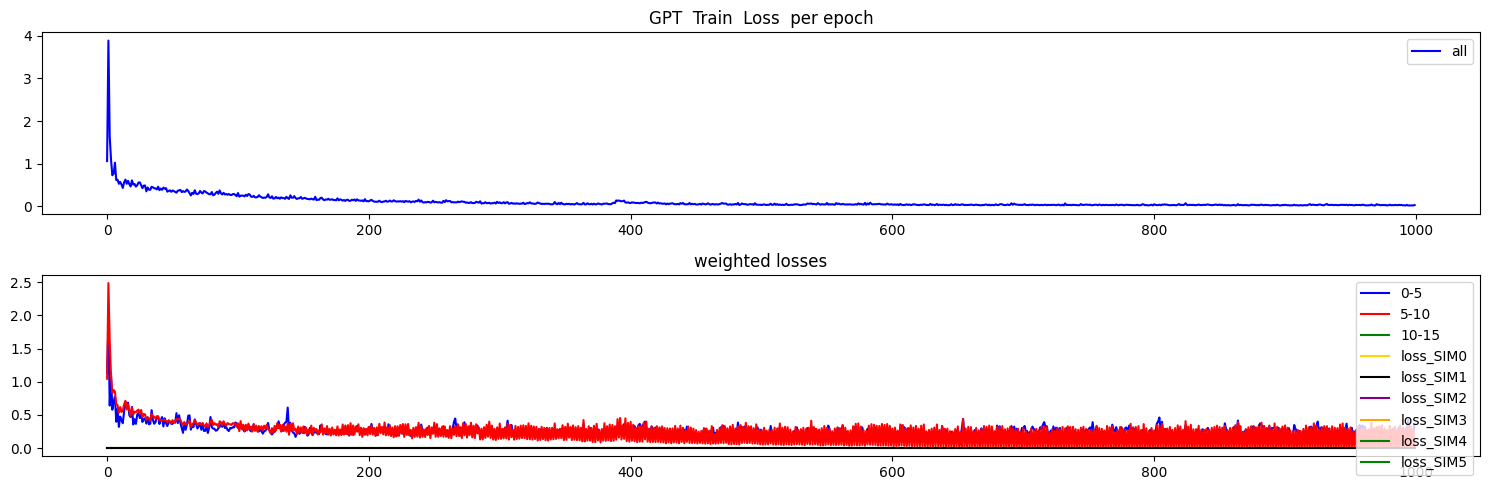

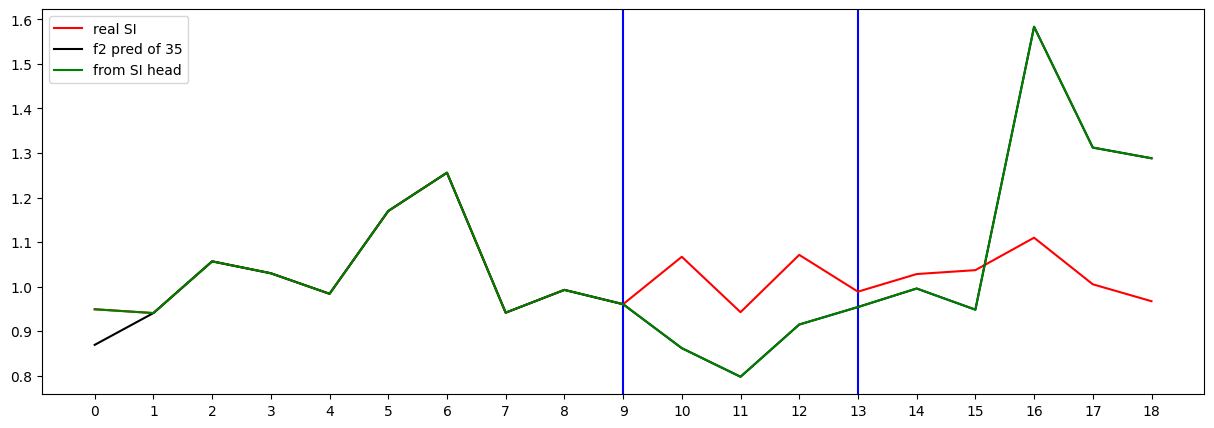

Testing R**2 - (all) - (no inputs):  0.9141679278502599
Testing R**2 - (f2) - SI full (no inputs):  -26.18192726045685
Testing R**2 - SI head only (no inputs):  -26.18192726045685
0 ...index R**2 (no inputs):  -15.85524122110493
1 ...index R**2 (no inputs):  -3.624837985495854
2 ...index R**2 (no inputs):  -26.18192726045685
3 ...index R**2 (no inputs):  -14262.224284035505
4 ...index R**2 (no inputs):  -8898.805993271944
5 ...index R**2 (no inputs):  -23.707947189910065
6 ...index R**2 (no inputs):  0.7646092849386124
7 ...index R**2 (no inputs):  -1.213175355441379
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3391563356670413
10 ...index R**2 (no inputs):  -0.05359374679372397
11 ...index R**2 (no inputs):  0.10002701446015705
12 ...index R**2 (no inputs):  -0.29840702893770144
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -24.097529122898468
16 ...index R**2 (no inputs):  -2.674115517148652
17 ...index R**2

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.301240
Loss_SI: 0.9696176648139954 Loss_all: 1.2316280603408813
===
[200] Train Loss: 0.209802
Loss_SI: 0.20761795341968536 Loss_all: 0.25293055176734924
===
[400] Train Loss: 0.113598
Loss_SI: 0.2033570259809494 Loss_all: 0.26894858479499817
===
[600] Train Loss: 0.060402
Loss_SI: 0.2387256622314453 Loss_all: 0.22925981879234314
===
[800] Train Loss: 0.070586
Loss_SI: 0.20097501575946808 Loss_all: 0.19611340761184692
===


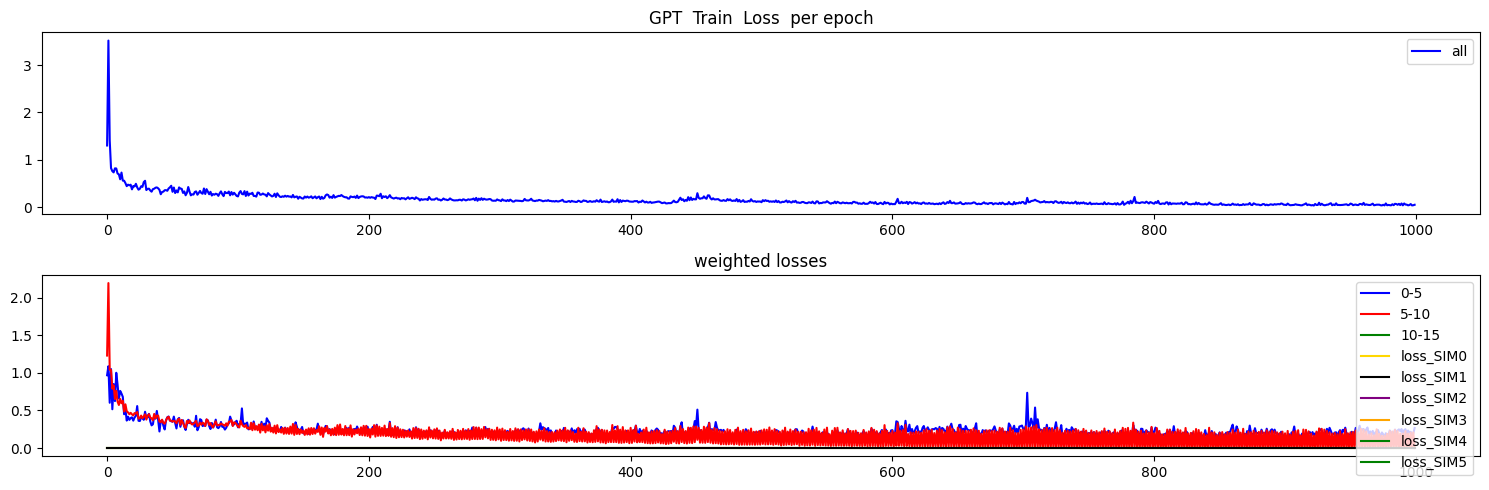

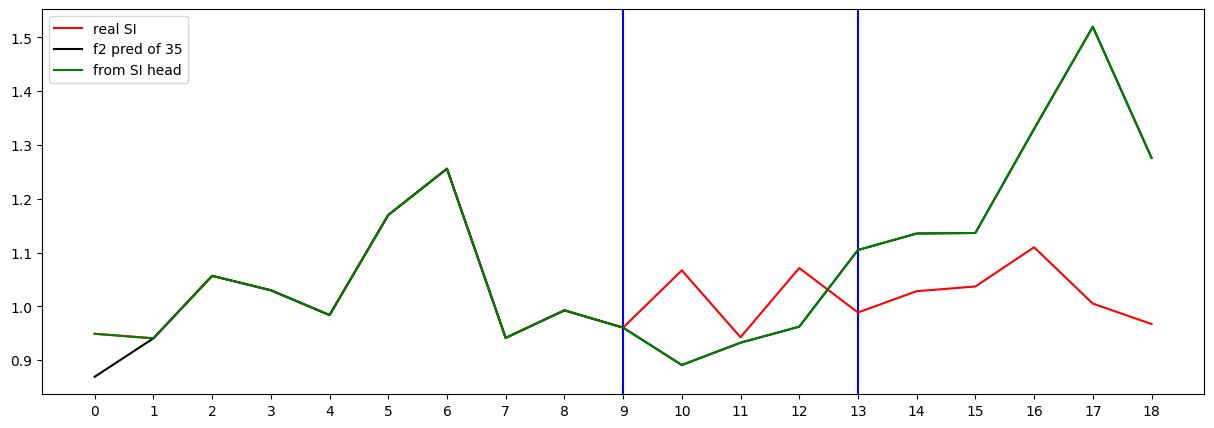

Testing R**2 - (all) - (no inputs):  0.9203993639250675
Testing R**2 - (f2) - SI full (no inputs):  -20.94684165282804
Testing R**2 - SI head only (no inputs):  -20.94684165282804
0 ...index R**2 (no inputs):  -4.166119286883011
1 ...index R**2 (no inputs):  -14.622885952499322
2 ...index R**2 (no inputs):  -20.94684165282804
3 ...index R**2 (no inputs):  -13111.151124246799
4 ...index R**2 (no inputs):  -10212.703424613283
5 ...index R**2 (no inputs):  -21.881527839276142
6 ...index R**2 (no inputs):  0.6762760330454408
7 ...index R**2 (no inputs):  -1.1222755806184082
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.44666802324337884
10 ...index R**2 (no inputs):  0.2934326451139907
11 ...index R**2 (no inputs):  -0.050489708895781416
12 ...index R**2 (no inputs):  -0.7839006206786523
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.0037371680034655
16 ...index R**2 (no inputs):  -3.7141905277215095
17 ...index 

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.505295
Loss_SI: 2.2723171710968018 Loss_all: 1.5017693042755127
===
[200] Train Loss: 0.211023
Loss_SI: 0.20644886791706085 Loss_all: 0.24502000212669373
===
[400] Train Loss: 0.129900
Loss_SI: 0.22689686715602875 Loss_all: 0.28073692321777344
===
[600] Train Loss: 0.092170
Loss_SI: 0.22876806557178497 Loss_all: 0.2509857714176178
===
[800] Train Loss: 0.055935
Loss_SI: 0.21393175423145294 Loss_all: 0.2329360544681549
===


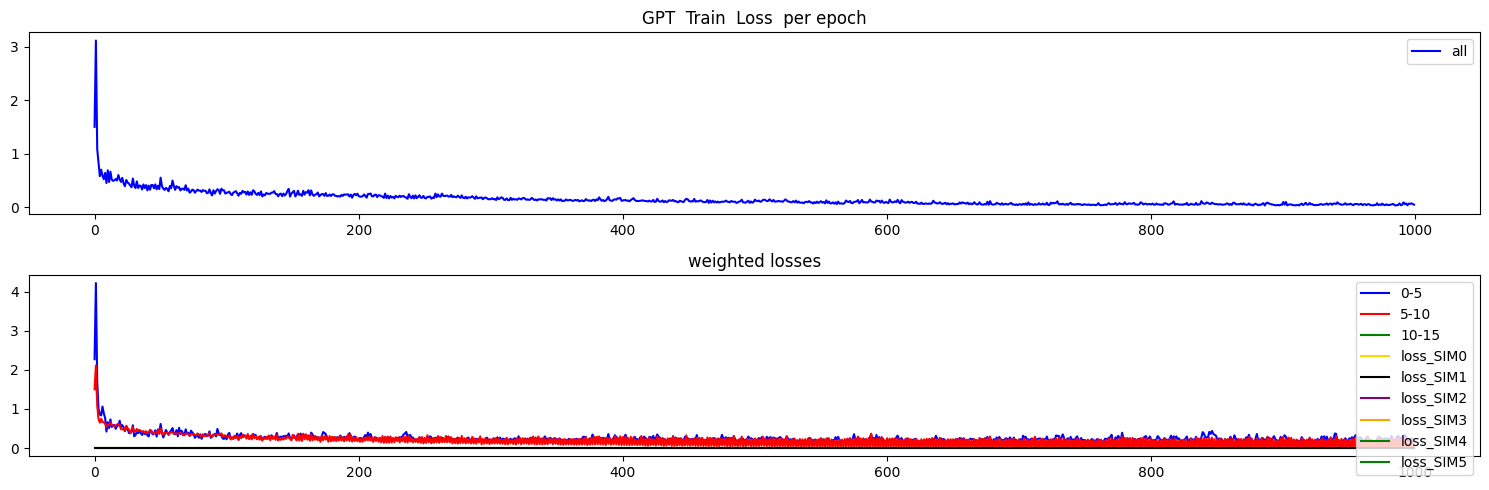

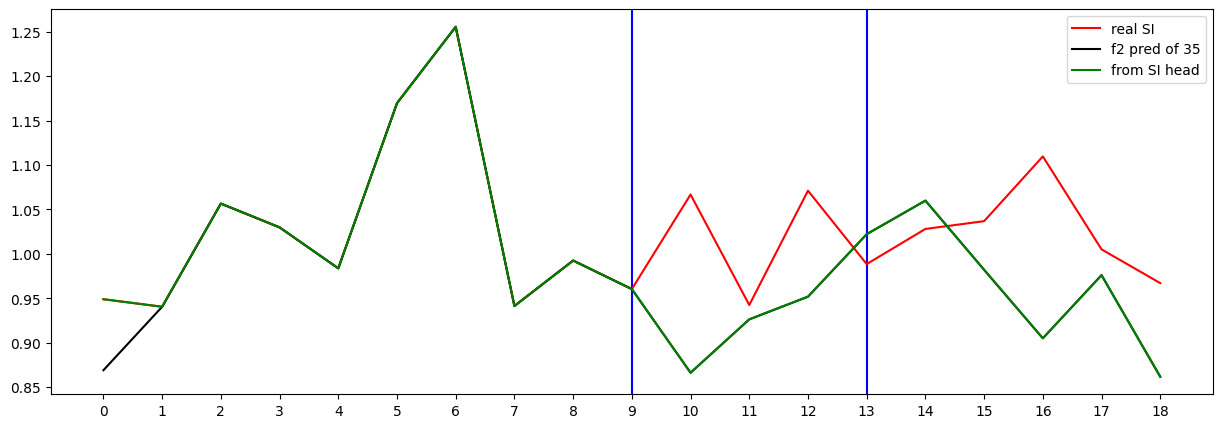

Testing R**2 - (all) - (no inputs):  0.93482987991227
Testing R**2 - (f2) - SI full (no inputs):  -1.4758610558349985
Testing R**2 - SI head only (no inputs):  -1.4758610558349985
0 ...index R**2 (no inputs):  -0.07504446421463684
1 ...index R**2 (no inputs):  -9.666325761886897
2 ...index R**2 (no inputs):  -1.4758610558349985
3 ...index R**2 (no inputs):  -355.883426856657
4 ...index R**2 (no inputs):  -36816.35744147851
5 ...index R**2 (no inputs):  -17.648628801997248
6 ...index R**2 (no inputs):  0.47657750583928316
7 ...index R**2 (no inputs):  -99.15199865171768
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9917636738002227
10 ...index R**2 (no inputs):  -0.1375587471017572
11 ...index R**2 (no inputs):  -2.7687926600571378
12 ...index R**2 (no inputs):  -2.865491568566342
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.6078257156125204
16 ...index R**2 (no inputs):  -9.218324974778126
17 ...index R**2 

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.339913
Loss_SI: 1.6486214399337769 Loss_all: 1.2871183156967163
===
[200] Train Loss: 0.072984
Loss_SI: 0.490262508392334 Loss_all: 0.4342699646949768
===
[400] Train Loss: 0.031650
Loss_SI: 0.5659605264663696 Loss_all: 0.4421851336956024
===
[600] Train Loss: 0.046356
Loss_SI: 0.5547599196434021 Loss_all: 0.4630616009235382
===
[800] Train Loss: 0.032203
Loss_SI: 0.5937961935997009 Loss_all: 0.41966211795806885
===


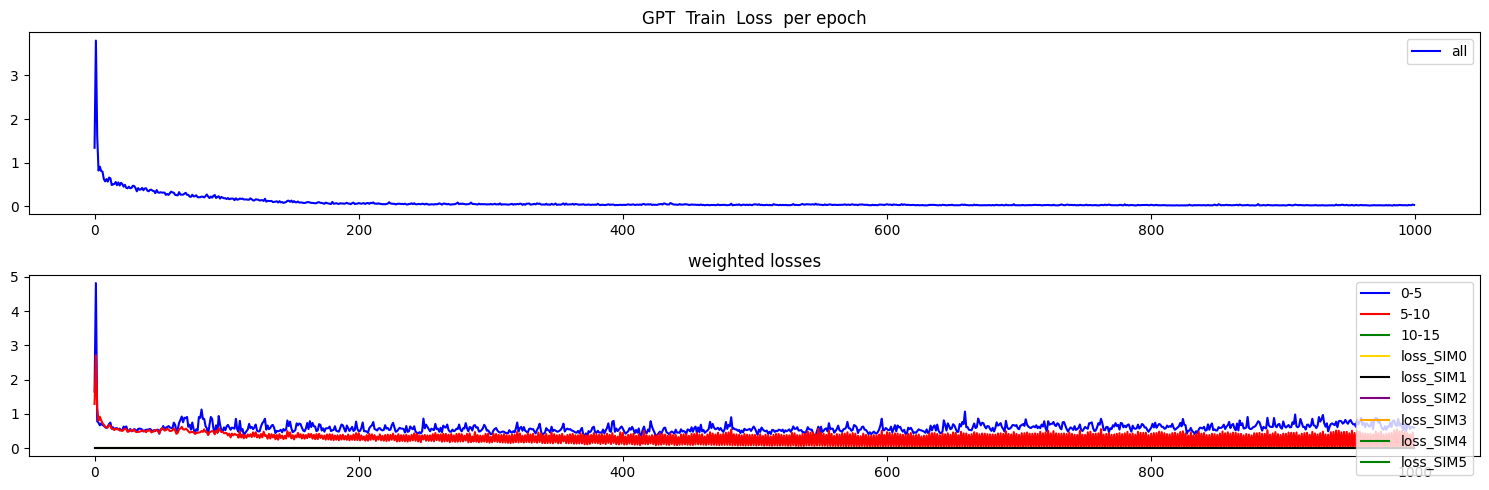

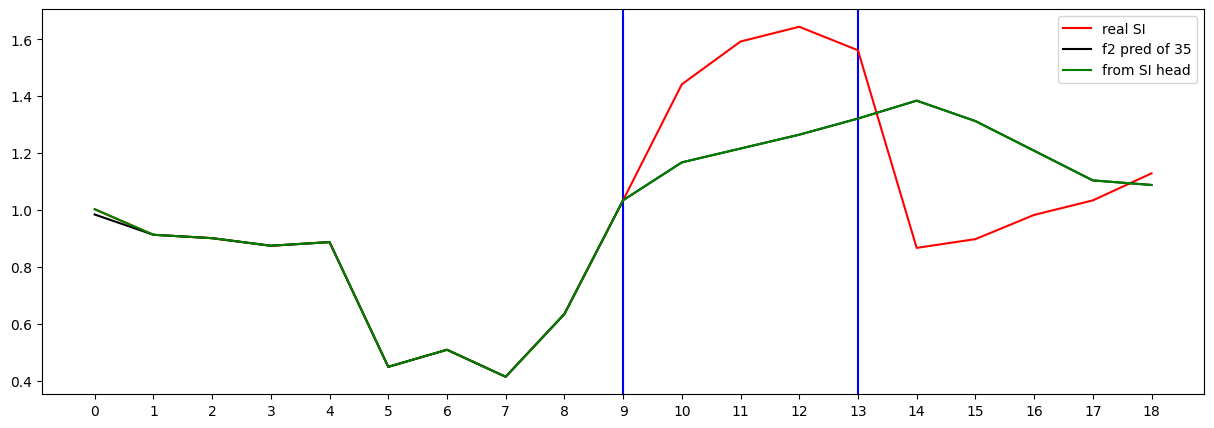

Testing R**2 - (all) - (no inputs):  0.5226965917055169
Testing R**2 - (f2) - SI full (no inputs):  -0.2998310803721196
Testing R**2 - SI head only (no inputs):  -0.2998310803721196
0 ...index R**2 (no inputs):  -0.19611067037345875
1 ...index R**2 (no inputs):  -0.4100755821078723
2 ...index R**2 (no inputs):  -0.2998310803721196
3 ...index R**2 (no inputs):  -1.7396732474481924
4 ...index R**2 (no inputs):  -0.8327033313558743
5 ...index R**2 (no inputs):  -1.2236678401365522
6 ...index R**2 (no inputs):  -1422.3672122776754
7 ...index R**2 (no inputs):  -0.10183358794988728
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.263588294937306
10 ...index R**2 (no inputs):  0.12017717768400782
11 ...index R**2 (no inputs):  -229.99300107486414
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.182485074485648
16 ...index R**2 (no inputs):  -1.9270682662498908
17 ...index R**2 (no inpu

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.284157
Loss_SI: 1.6886590719223022 Loss_all: 1.2972397804260254
===
[200] Train Loss: 0.142351
Loss_SI: 0.6423568725585938 Loss_all: 0.3790803849697113
===
[400] Train Loss: 0.044492
Loss_SI: 0.527963399887085 Loss_all: 0.3114088475704193
===
[600] Train Loss: 0.068286
Loss_SI: 0.4312360882759094 Loss_all: 0.30692258477211
===
[800] Train Loss: 0.029794
Loss_SI: 0.49782583117485046 Loss_all: 0.33439016342163086
===


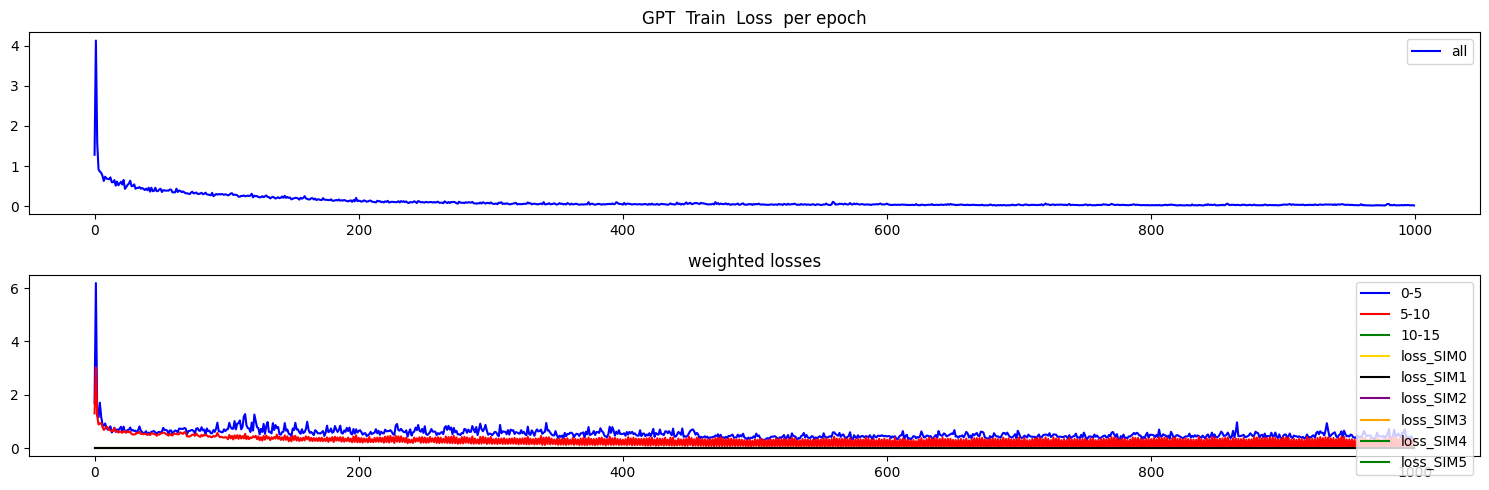

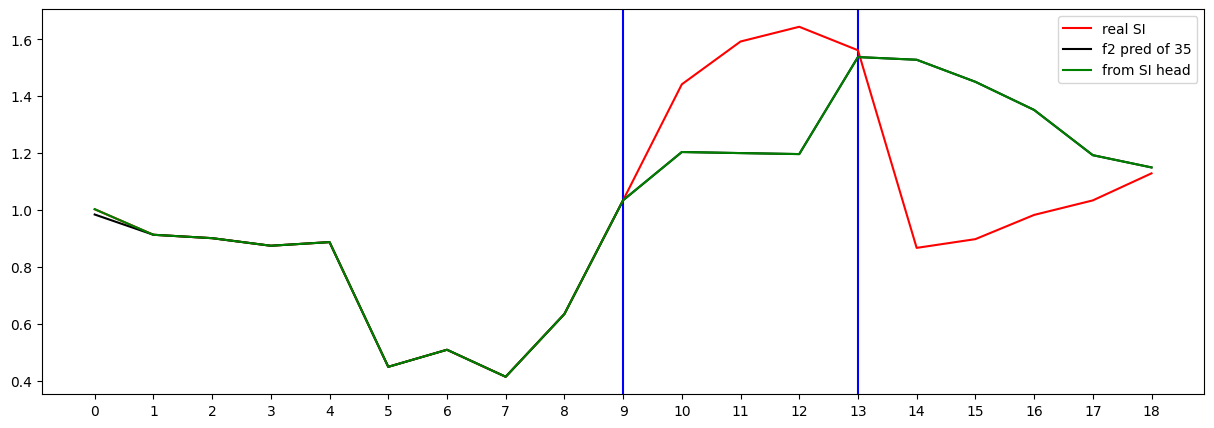

Testing R**2 - (all) - (no inputs):  0.3296327027414737
Testing R**2 - (f2) - SI full (no inputs):  -1.0875311873166762
Testing R**2 - SI head only (no inputs):  -1.0875311873166762
0 ...index R**2 (no inputs):  -0.5523703148891927
1 ...index R**2 (no inputs):  -0.5976661553108795
2 ...index R**2 (no inputs):  -1.0875311873166762
3 ...index R**2 (no inputs):  -1.9784710756785207
4 ...index R**2 (no inputs):  -0.8827309920557638
5 ...index R**2 (no inputs):  -2.124054999665069
6 ...index R**2 (no inputs):  -8254.67187986172
7 ...index R**2 (no inputs):  -1.6760416485509673
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.28981224923415505
10 ...index R**2 (no inputs):  -1.0594974153395027
11 ...index R**2 (no inputs):  -83.90526247761191
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.677966270879166
16 ...index R**2 (no inputs):  -1.9965394589287064
17 ...index R**2 (no inputs):

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.229840
Loss_SI: 1.281283974647522 Loss_all: 1.2082319259643555
===
[200] Train Loss: 0.205291
Loss_SI: 0.34791120886802673 Loss_all: 0.3017323911190033
===
[400] Train Loss: 0.097373
Loss_SI: 0.3002288043498993 Loss_all: 0.26673123240470886
===
[600] Train Loss: 0.062401
Loss_SI: 0.27768728137016296 Loss_all: 0.2877080738544464
===
[800] Train Loss: 0.031173
Loss_SI: 0.2225237935781479 Loss_all: 0.21795754134655
===


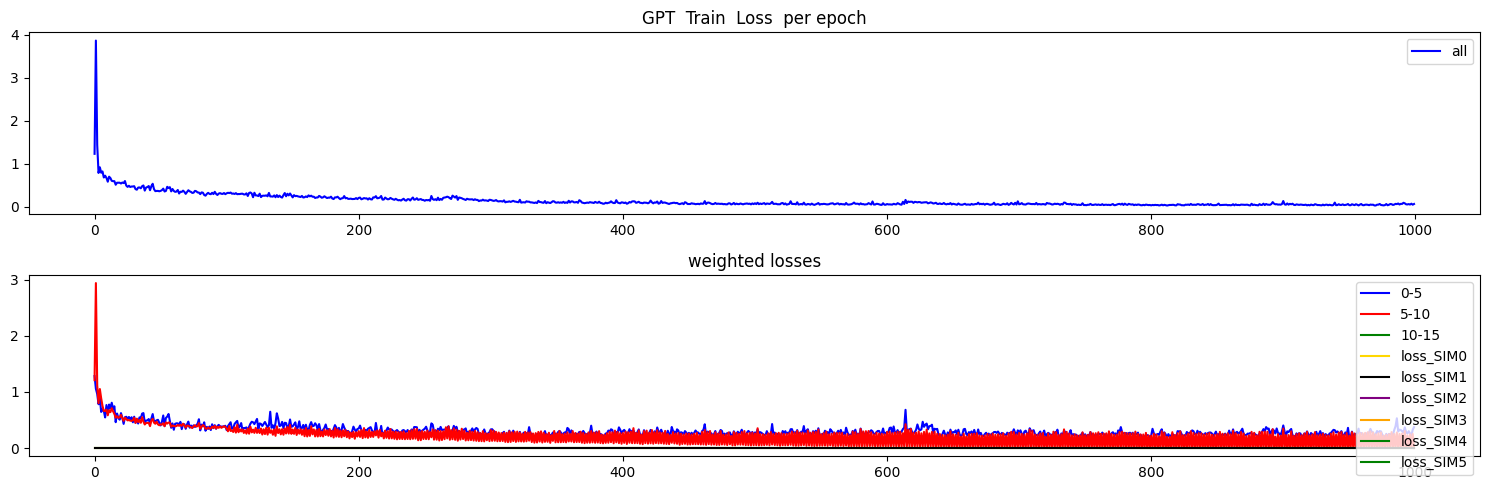

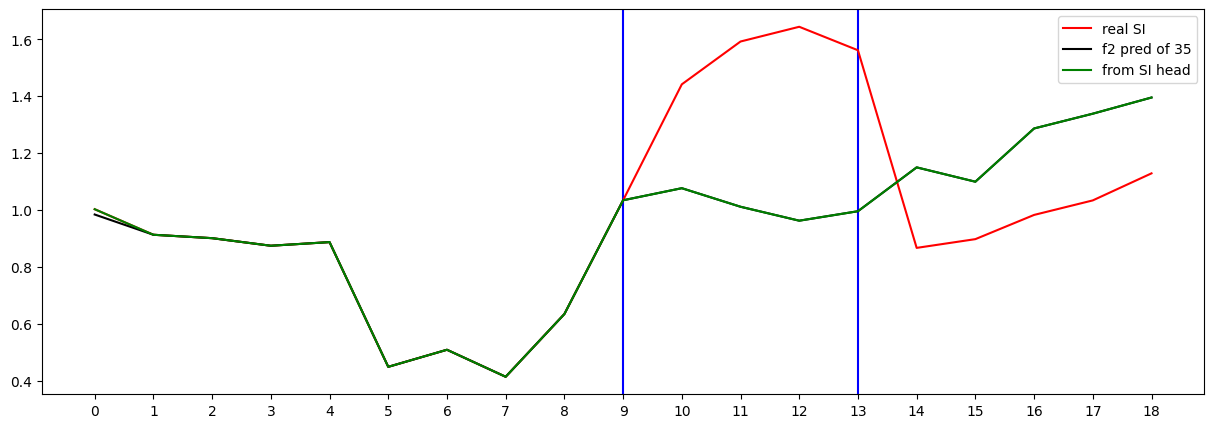

Testing R**2 - (all) - (no inputs):  0.5523377575562447
Testing R**2 - (f2) - SI full (no inputs):  -0.7215450889455075
Testing R**2 - SI head only (no inputs):  -0.7215450889455075
0 ...index R**2 (no inputs):  0.0025747973145551217
1 ...index R**2 (no inputs):  -2.891069290193061
2 ...index R**2 (no inputs):  -0.7215450889455075
3 ...index R**2 (no inputs):  -1.8795552387681345
4 ...index R**2 (no inputs):  -1.461334847246492
5 ...index R**2 (no inputs):  -1.0845420328031423
6 ...index R**2 (no inputs):  -5143.104600843054
7 ...index R**2 (no inputs):  -0.4579583770469302
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.182001291609847
10 ...index R**2 (no inputs):  -0.8905727282580576
11 ...index R**2 (no inputs):  -25.613393089725704
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.6164118933900093
16 ...index R**2 (no inputs):  -3.0040206418755915
17 ...index R**2 (no inputs

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.365170
Loss_SI: 1.4696937799453735 Loss_all: 1.4226402044296265
===
[200] Train Loss: 0.218722
Loss_SI: 0.33722928166389465 Loss_all: 0.2897568643093109
===
[400] Train Loss: 0.103403
Loss_SI: 0.28671547770500183 Loss_all: 0.2900434732437134
===
[600] Train Loss: 0.085642
Loss_SI: 0.30178260803222656 Loss_all: 0.2728189527988434
===
[800] Train Loss: 0.057216
Loss_SI: 0.2322799265384674 Loss_all: 0.2507934868335724
===


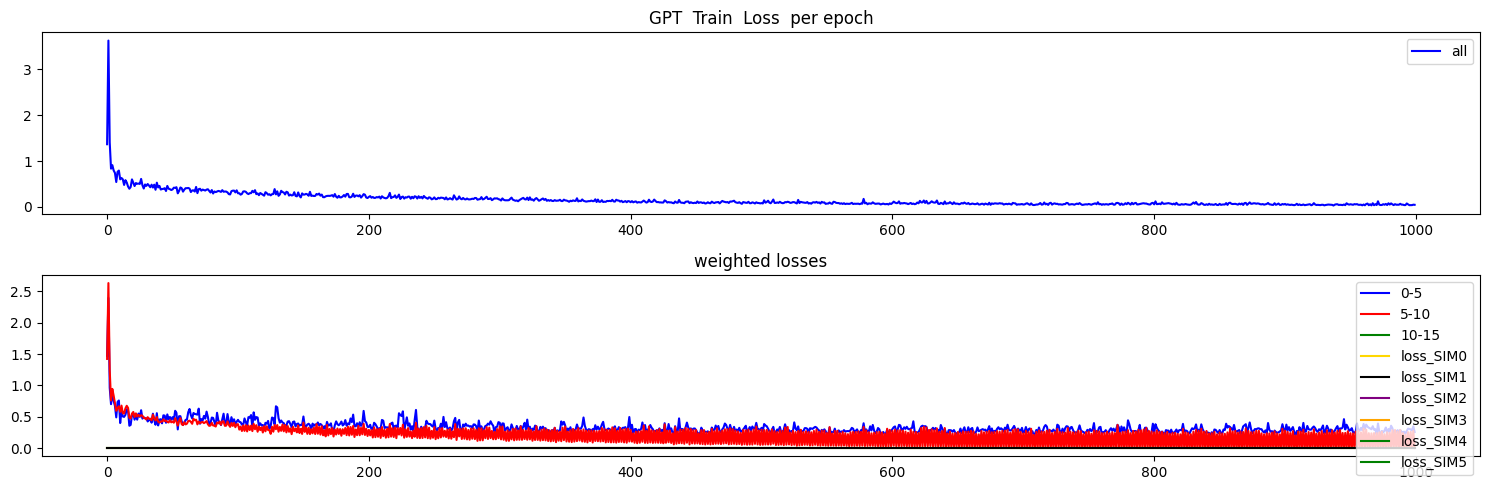

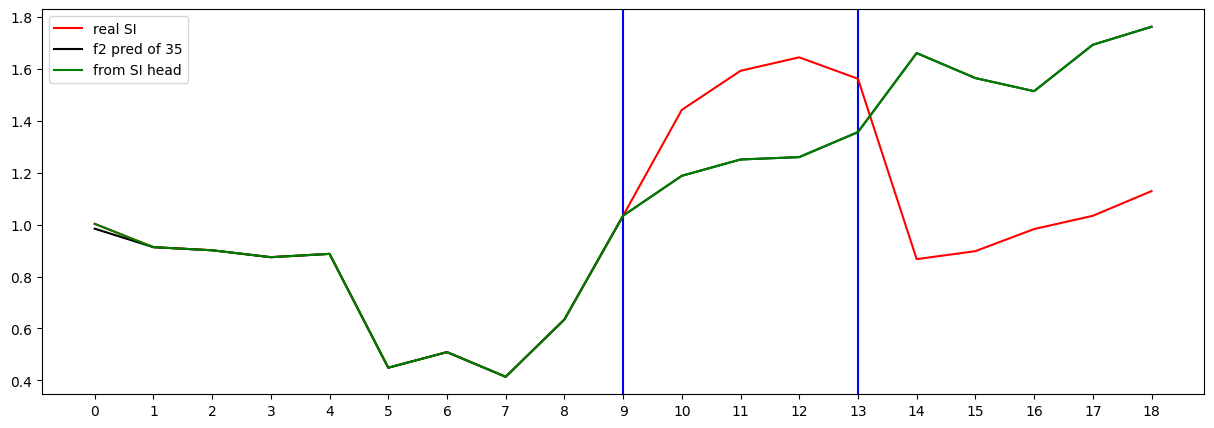

Testing R**2 - (all) - (no inputs):  -0.0003105379763368443
Testing R**2 - (f2) - SI full (no inputs):  -2.3573418246914
Testing R**2 - SI head only (no inputs):  -2.3573418246914
0 ...index R**2 (no inputs):  -0.23414867132053185
1 ...index R**2 (no inputs):  -4.284565800828151
2 ...index R**2 (no inputs):  -2.3573418246914
3 ...index R**2 (no inputs):  -4.31946960969307
4 ...index R**2 (no inputs):  -2.2868606383683248
5 ...index R**2 (no inputs):  -3.658685921554688
6 ...index R**2 (no inputs):  -33318.91773198227
7 ...index R**2 (no inputs):  -1.3952332144674666
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.057336479041647
10 ...index R**2 (no inputs):  -0.7086365547598739
11 ...index R**2 (no inputs):  -89.64111163904595
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.3736347654919623
16 ...index R**2 (no inputs):  -3.2485396169388085
17 ...index R**2 (no inputs):  -269.

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.230360
Loss_SI: 1.509194254875183 Loss_all: 1.2133811712265015
===
[200] Train Loss: 0.044910
Loss_SI: 0.7864908576011658 Loss_all: 0.4410885274410248
===
[400] Train Loss: 0.036666
Loss_SI: 0.6950498819351196 Loss_all: 0.37384164333343506
===
[600] Train Loss: 0.026216
Loss_SI: 0.4983622133731842 Loss_all: 0.38308724761009216
===
[800] Train Loss: 0.018965
Loss_SI: 0.4672973155975342 Loss_all: 0.34289252758026123
===


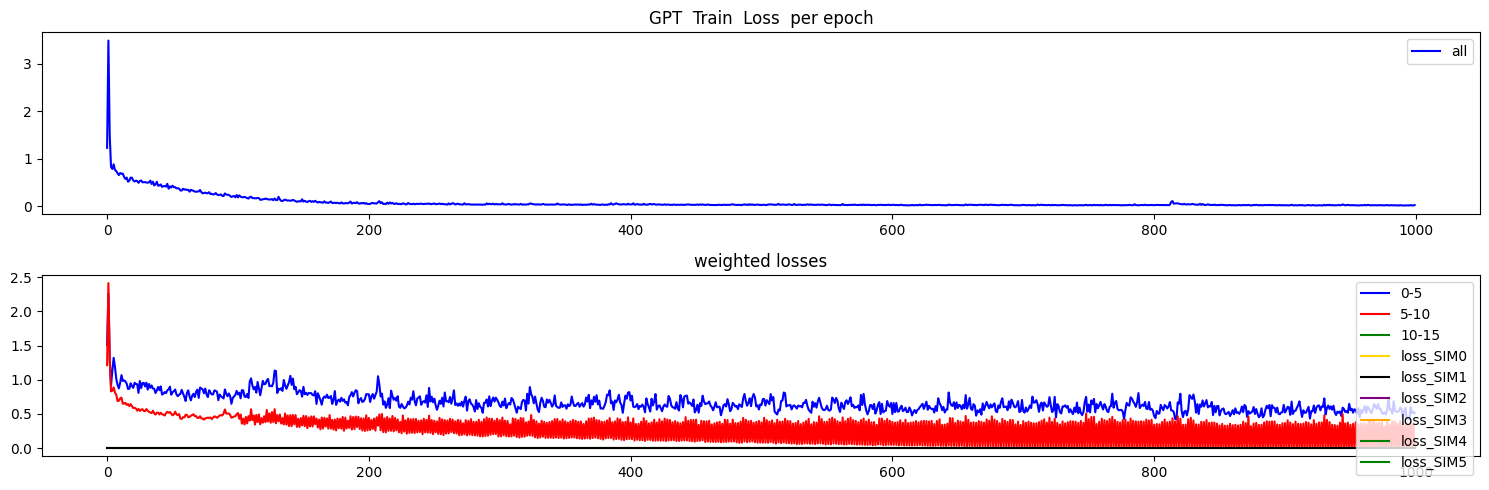

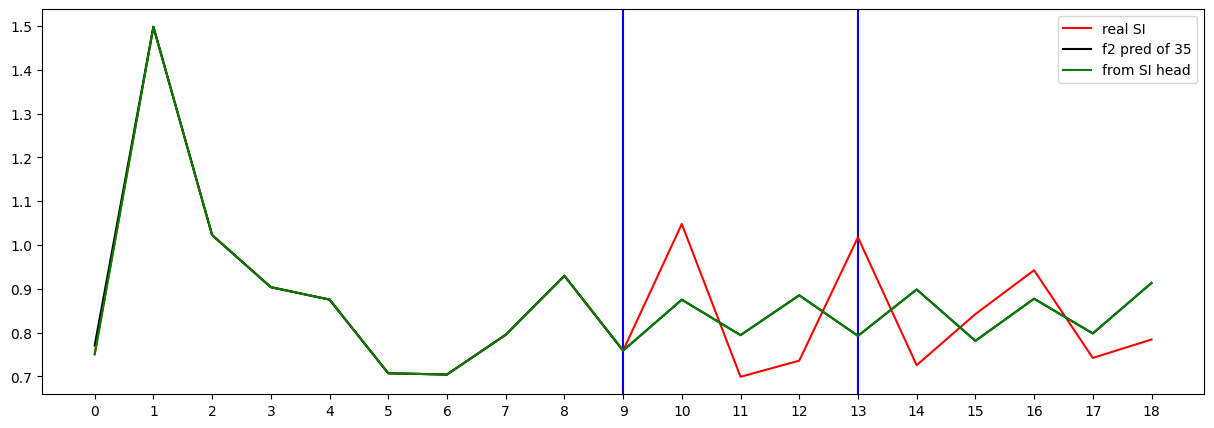

Testing R**2 - (all) - (no inputs):  0.992827703987361
Testing R**2 - (f2) - SI full (no inputs):  -0.37225698245785943
Testing R**2 - SI head only (no inputs):  -0.37225698245785943
0 ...index R**2 (no inputs):  -0.3054775427679135
1 ...index R**2 (no inputs):  -0.1671160054465699
2 ...index R**2 (no inputs):  -0.37225698245785943
3 ...index R**2 (no inputs):  -1.8587710307915146
4 ...index R**2 (no inputs):  -0.06438574202365555
5 ...index R**2 (no inputs):  -6.139180326438646
6 ...index R**2 (no inputs):  -10.944822737682781
7 ...index R**2 (no inputs):  -3.901593312006545
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.9406402619114633
10 ...index R**2 (no inputs):  -0.2345659242362519
11 ...index R**2 (no inputs):  -3.0498642708353056
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5767488058592822
16 ...index R**2 (no inputs):  -0.2305199327876586
17 ...index R**2 (no inp

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.200602
Loss_SI: 1.054911494255066 Loss_all: 1.1727964878082275
===
[200] Train Loss: 0.149510
Loss_SI: 0.2153126299381256 Loss_all: 0.31104543805122375
===
[400] Train Loss: 0.083207
Loss_SI: 0.24225397408008575 Loss_all: 0.2881583571434021
===
[600] Train Loss: 0.034090
Loss_SI: 0.24872832000255585 Loss_all: 0.27963513135910034
===
[800] Train Loss: 0.035428
Loss_SI: 0.2809355556964874 Loss_all: 0.27237752079963684
===


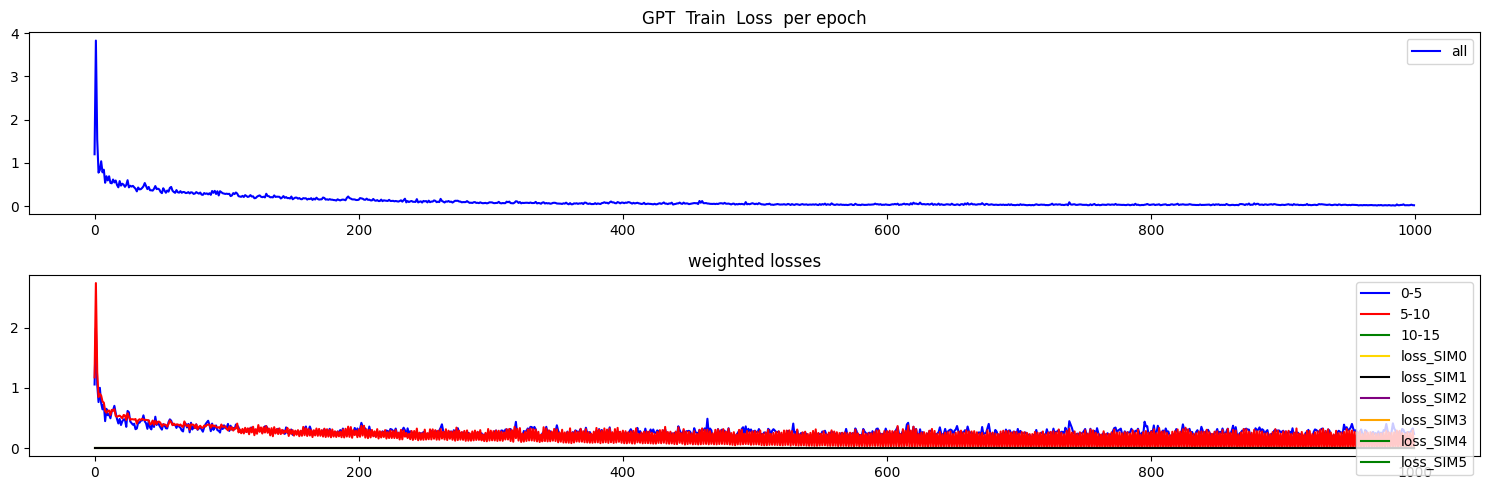

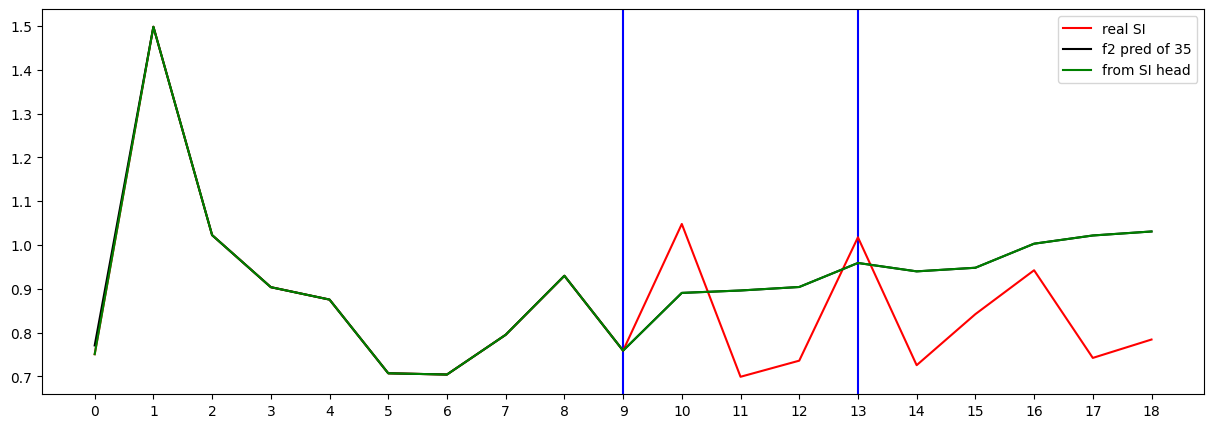

Testing R**2 - (all) - (no inputs):  0.9930098951054256
Testing R**2 - (f2) - SI full (no inputs):  -2.600893207396526
Testing R**2 - SI head only (no inputs):  -2.600893207396526
0 ...index R**2 (no inputs):  -0.5146406948735385
1 ...index R**2 (no inputs):  -0.4319021532252578
2 ...index R**2 (no inputs):  -2.600893207396526
3 ...index R**2 (no inputs):  -336.9280366007783
4 ...index R**2 (no inputs):  -0.5665193274243143
5 ...index R**2 (no inputs):  -5.916633397043369
6 ...index R**2 (no inputs):  -15.426818667622136
7 ...index R**2 (no inputs):  -171.57505204260974
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2165145096735084
10 ...index R**2 (no inputs):  -0.06991160126957507
11 ...index R**2 (no inputs):  -28.895036919008803
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.9420954279068607
16 ...index R**2 (no inputs):  -0.4198603810114616
17 ...index R**2 (no inputs):

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.098970
Loss_SI: 1.2606748342514038 Loss_all: 1.1535054445266724
===
[200] Train Loss: 0.189161
Loss_SI: 0.23268190026283264 Loss_all: 0.2625737190246582
===
[400] Train Loss: 0.102172
Loss_SI: 0.18727955222129822 Loss_all: 0.2533838450908661
===
[600] Train Loss: 0.066211
Loss_SI: 0.3174285888671875 Loss_all: 0.2412785142660141
===
[800] Train Loss: 0.042340
Loss_SI: 0.24285006523132324 Loss_all: 0.25394898653030396
===


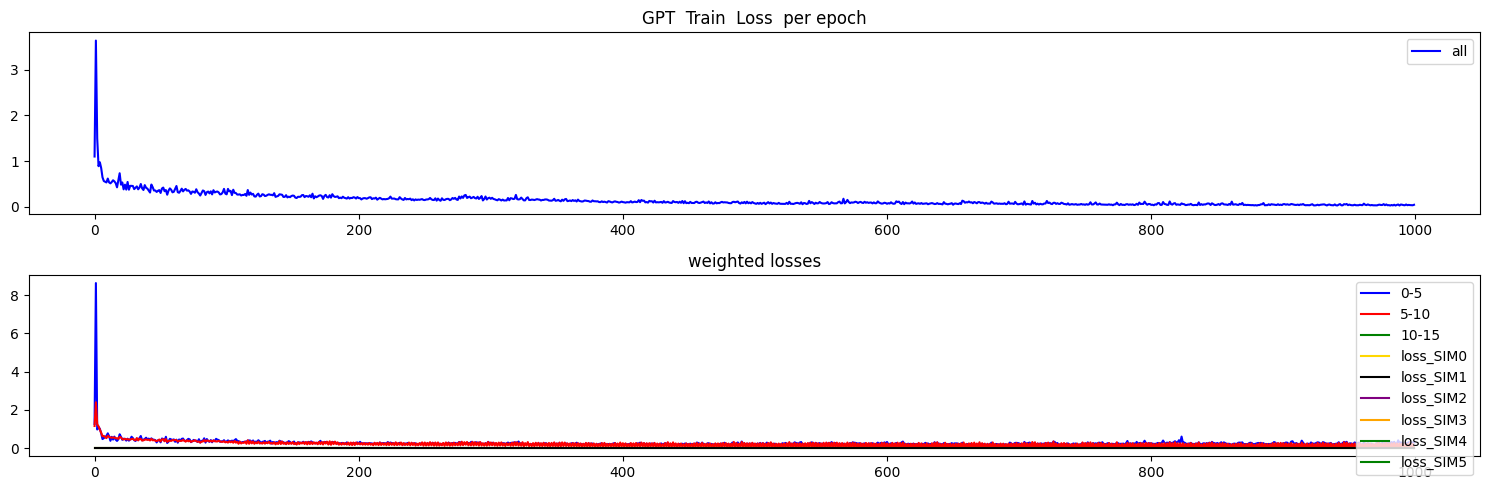

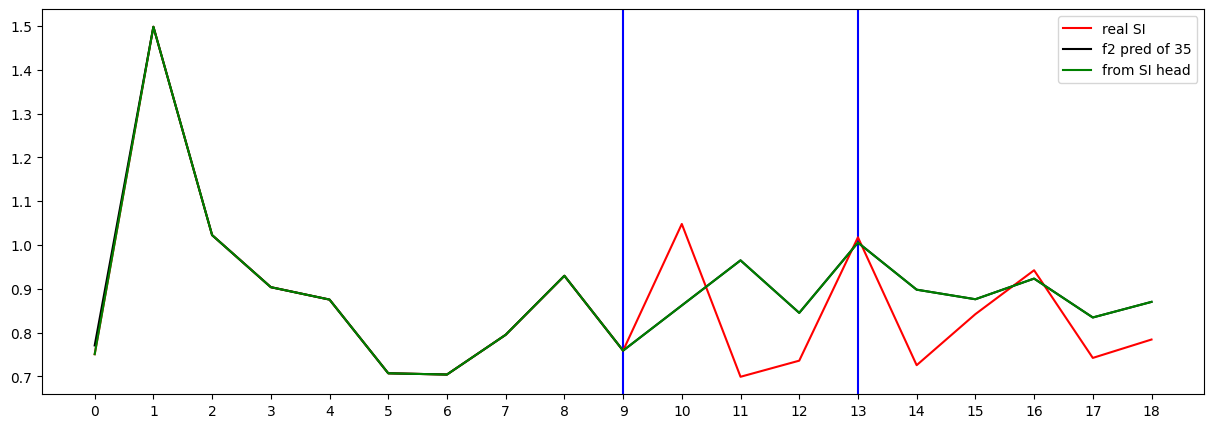

Testing R**2 - (all) - (no inputs):  0.9965690216183908
Testing R**2 - (f2) - SI full (no inputs):  -1.5697405825761033
Testing R**2 - SI head only (no inputs):  -1.5697405825761033
0 ...index R**2 (no inputs):  -1.1127608063257495
1 ...index R**2 (no inputs):  -0.1843778945898118
2 ...index R**2 (no inputs):  -1.5697405825761033
3 ...index R**2 (no inputs):  -271.1884076704103
4 ...index R**2 (no inputs):  -1.7603556947361265
5 ...index R**2 (no inputs):  -2.3339611404535767
6 ...index R**2 (no inputs):  -30.53334322850254
7 ...index R**2 (no inputs):  -792.4547738622275
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.596010631316912
10 ...index R**2 (no inputs):  0.29189327293260925
11 ...index R**2 (no inputs):  -121.28564178177294
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9288641565356297
16 ...index R**2 (no inputs):  0.0029596021486173463
17 ...index R**2 (no inputs

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.149216
Loss_SI: 1.0905752182006836 Loss_all: 1.155795931816101
===
[200] Train Loss: 0.199019
Loss_SI: 0.28550100326538086 Loss_all: 0.2897840738296509
===
[400] Train Loss: 0.145562
Loss_SI: 0.22081533074378967 Loss_all: 0.2565365135669708
===
[600] Train Loss: 0.084256
Loss_SI: 0.24098701775074005 Loss_all: 0.2693755626678467
===
[800] Train Loss: 0.079018
Loss_SI: 0.21009483933448792 Loss_all: 0.24674181640148163
===


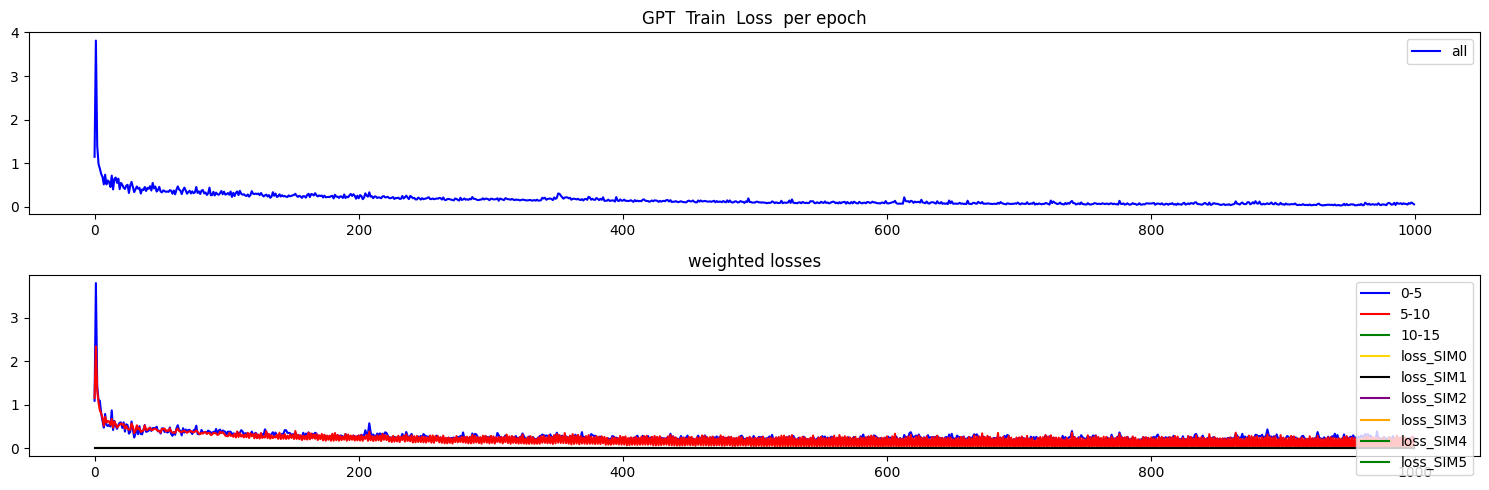

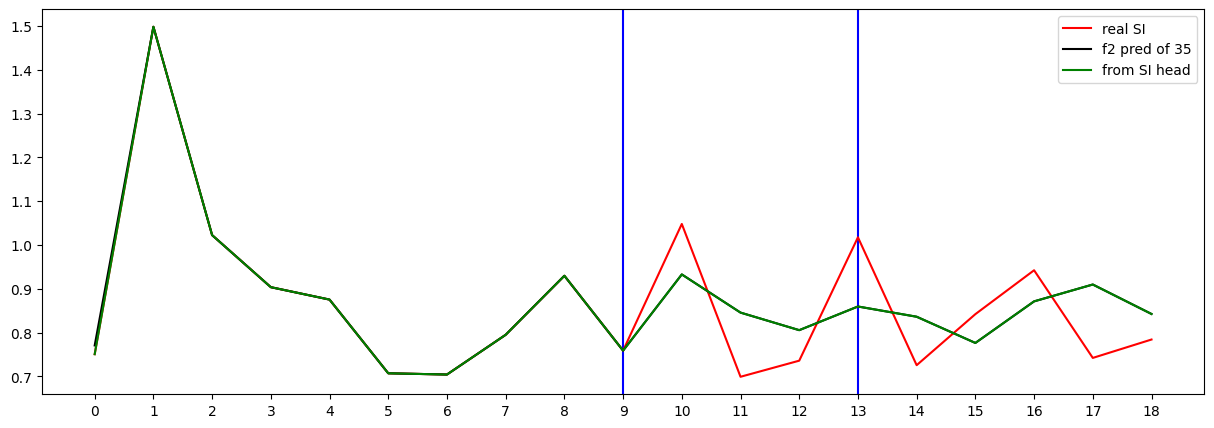

Testing R**2 - (all) - (no inputs):  0.9976863809657569
Testing R**2 - (f2) - SI full (no inputs):  -1.0837088700514483
Testing R**2 - SI head only (no inputs):  -1.0837088700514483
0 ...index R**2 (no inputs):  -0.9221392363560192
1 ...index R**2 (no inputs):  -0.31151609074083564
2 ...index R**2 (no inputs):  -1.0837088700514483
3 ...index R**2 (no inputs):  -31.949041555718466
4 ...index R**2 (no inputs):  -1.1214894994592295
5 ...index R**2 (no inputs):  -1.2054694221414053
6 ...index R**2 (no inputs):  -19.470906379848245
7 ...index R**2 (no inputs):  -848.244456843453
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.4578566045808916
10 ...index R**2 (no inputs):  -0.3763316802596923
11 ...index R**2 (no inputs):  -62.61075176625643
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4225694996493581
16 ...index R**2 (no inputs):  -0.5317362599387774
17 ...index R**2 (no inputs

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.214556
Loss_SI: 1.262284278869629 Loss_all: 1.2136826515197754
===
[200] Train Loss: 0.071439
Loss_SI: 0.3666304647922516 Loss_all: 0.28456583619117737
===
[400] Train Loss: 0.025913
Loss_SI: 0.416902631521225 Loss_all: 0.25633835792541504
===
[600] Train Loss: 0.026844
Loss_SI: 0.45519763231277466 Loss_all: 0.29397571086883545
===
[800] Train Loss: 0.019219
Loss_SI: 0.34345608949661255 Loss_all: 0.26297998428344727
===


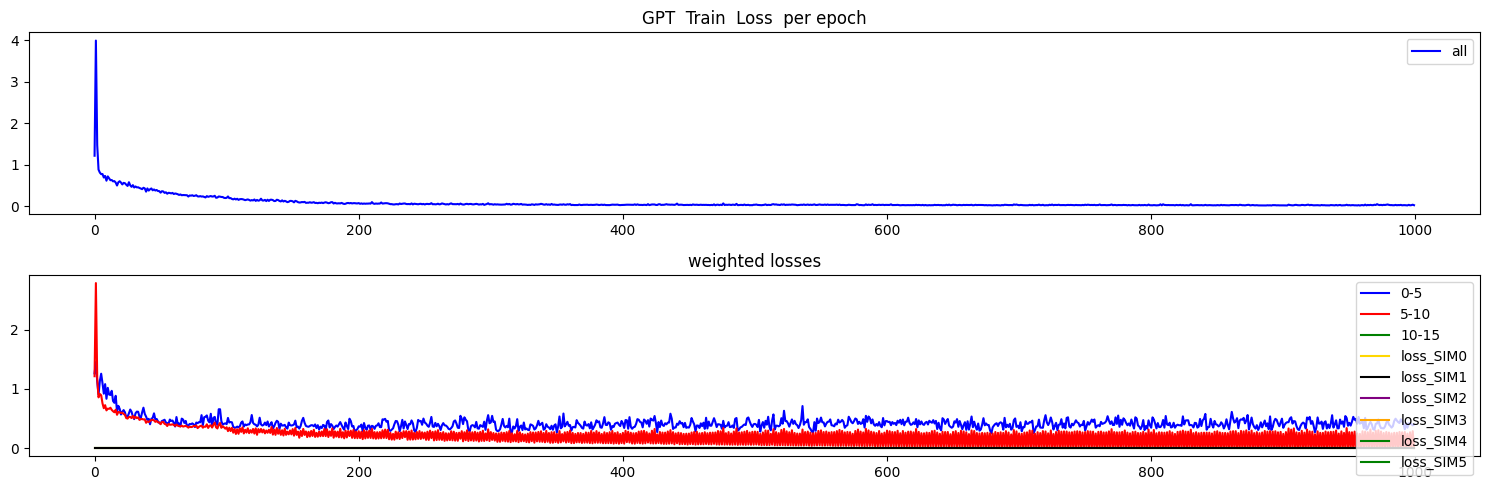

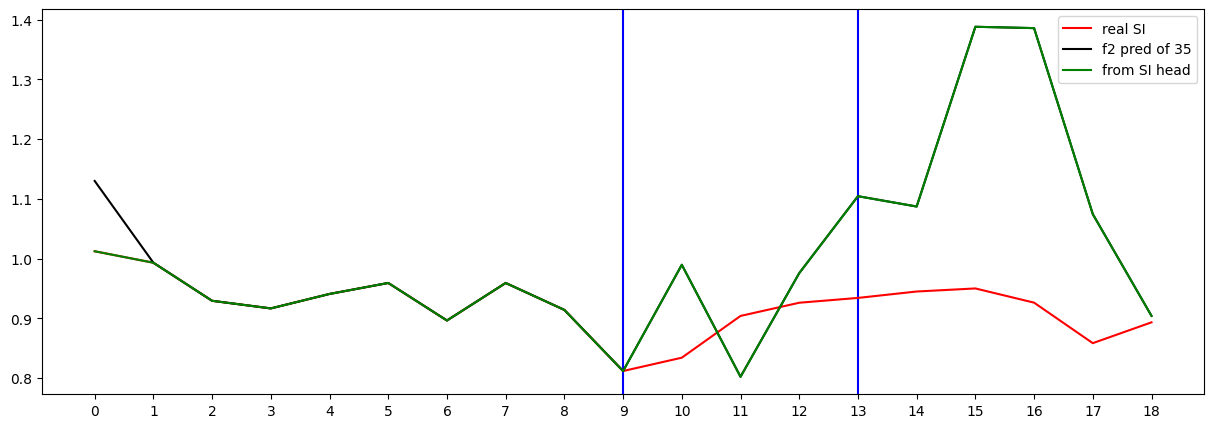

Testing R**2 - (all) - (no inputs):  0.955224327817438
Testing R**2 - (f2) - SI full (no inputs):  -40.596763911935376
Testing R**2 - SI head only (no inputs):  -40.596763911935376
0 ...index R**2 (no inputs):  -21.648166134989467
1 ...index R**2 (no inputs):  -14.691574100296986
2 ...index R**2 (no inputs):  -40.596763911935376
3 ...index R**2 (no inputs):  -552.0445090760902
4 ...index R**2 (no inputs):  -870.4226181005713
5 ...index R**2 (no inputs):  -20.982844070324177
6 ...index R**2 (no inputs):  -9014.12376804944
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7322824844212936
10 ...index R**2 (no inputs):  -2.187438047270787
11 ...index R**2 (no inputs):  -56.15937528705398
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.333097167088674
16 ...index R**2 (no inputs):  -0.2282528617510573
17 ...index R**2 (no inputs):  -304.704236810721


In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.194666
Loss_SI: 1.2779381275177002 Loss_all: 1.2423442602157593
===
[200] Train Loss: 0.110299
Loss_SI: 0.4111674427986145 Loss_all: 0.34601926803588867
===
[400] Train Loss: 0.057352
Loss_SI: 0.37024229764938354 Loss_all: 0.31010085344314575
===
[600] Train Loss: 0.032830
Loss_SI: 0.2957317531108856 Loss_all: 0.2858986556529999
===
[800] Train Loss: 0.033695
Loss_SI: 0.32761865854263306 Loss_all: 0.2855388820171356
===


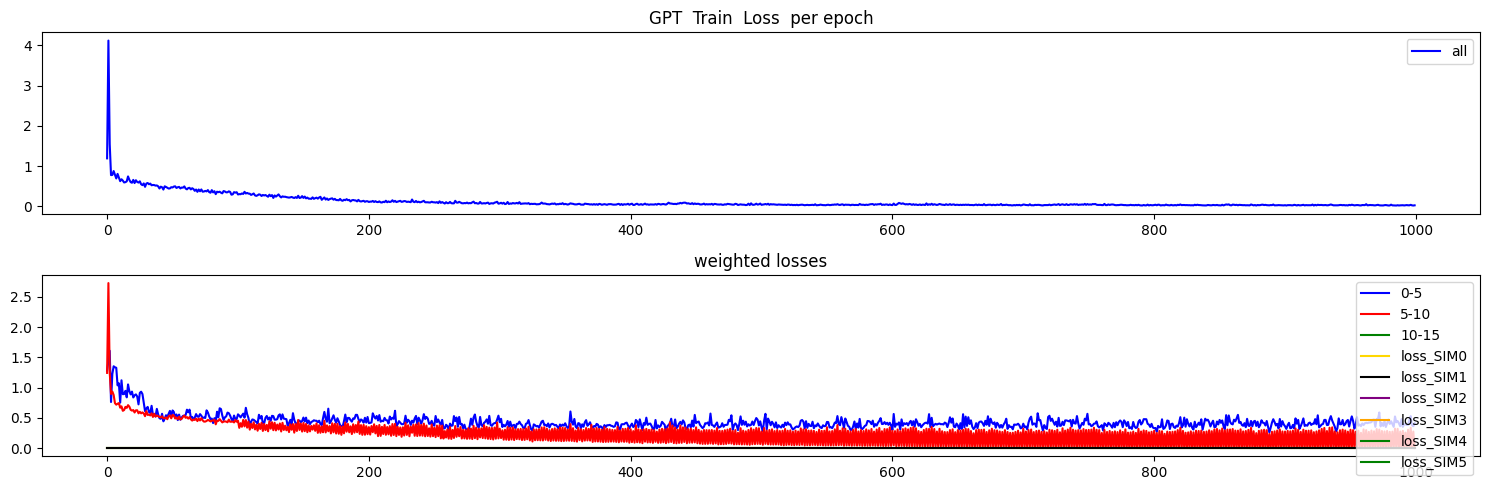

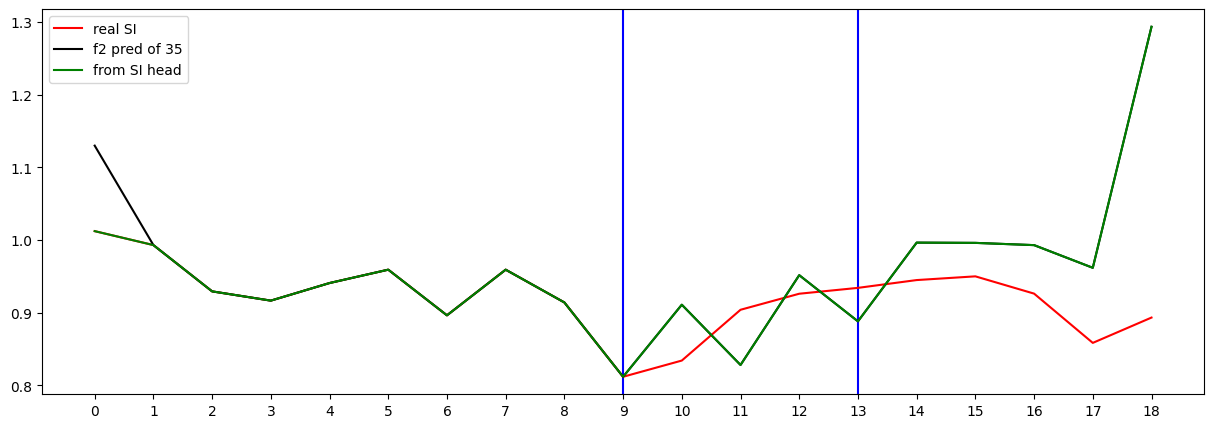

Testing R**2 - (all) - (no inputs):  0.8285934776437244
Testing R**2 - (f2) - SI full (no inputs):  -7.404992171794376
Testing R**2 - SI head only (no inputs):  -7.404992171794376
0 ...index R**2 (no inputs):  -3.4094992240152893
1 ...index R**2 (no inputs):  -3.7602910567355483
2 ...index R**2 (no inputs):  -7.404992171794376
3 ...index R**2 (no inputs):  -3286.1805748622146
4 ...index R**2 (no inputs):  -65.07530240441199
5 ...index R**2 (no inputs):  -83.34686626042134
6 ...index R**2 (no inputs):  -192.32650539465325
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7808459320552608
10 ...index R**2 (no inputs):  -1.116223931123045
11 ...index R**2 (no inputs):  -1374.9950357153302
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -10.019786934230797
16 ...index R**2 (no inputs):  -0.15233723063345117
17 ...index R**2 (no inputs):  -789.4537638810

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.230858
Loss_SI: 0.9288620948791504 Loss_all: 1.1568783521652222
===
[200] Train Loss: 0.170284
Loss_SI: 0.4602925479412079 Loss_all: 0.3749040961265564
===
[400] Train Loss: 0.059859
Loss_SI: 0.4221179187297821 Loss_all: 0.3445656895637512
===
[600] Train Loss: 0.045478
Loss_SI: 0.32710692286491394 Loss_all: 0.2636612057685852
===
[800] Train Loss: 0.035884
Loss_SI: 0.4591135084629059 Loss_all: 0.33234670758247375
===


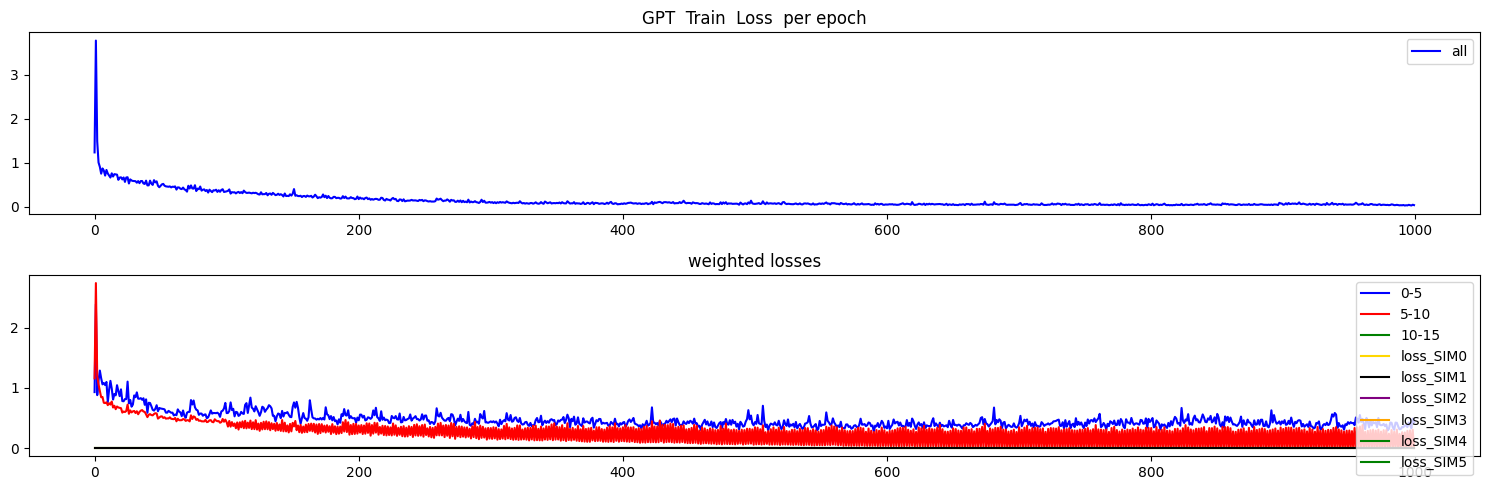

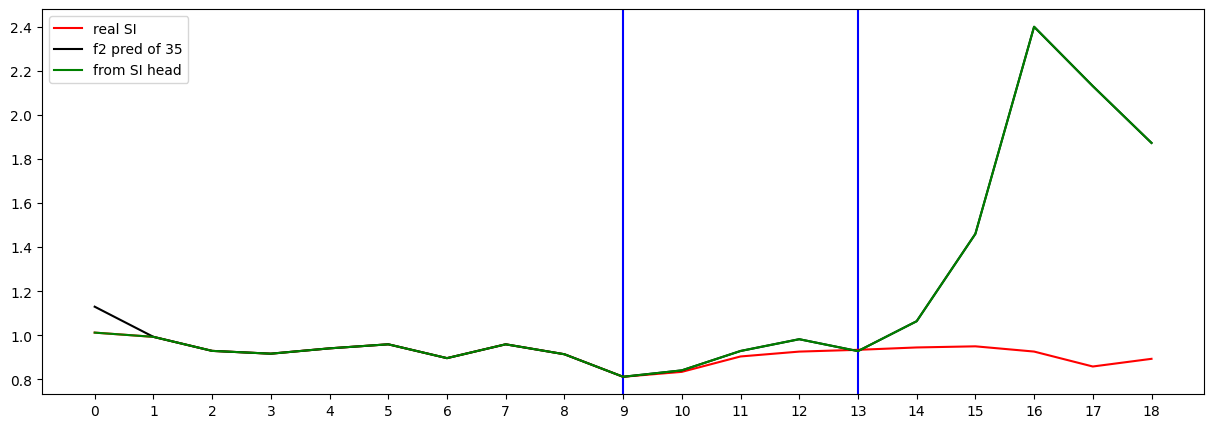

Testing R**2 - (all) - (no inputs):  0.8640364801918737
Testing R**2 - (f2) - SI full (no inputs):  -340.1591848623277
Testing R**2 - SI head only (no inputs):  -340.1591848623277
0 ...index R**2 (no inputs):  -41.4650747363464
1 ...index R**2 (no inputs):  -82.59576111186855
2 ...index R**2 (no inputs):  -340.1591848623277
3 ...index R**2 (no inputs):  -2917.6524079600986
4 ...index R**2 (no inputs):  -7370.721112467132
5 ...index R**2 (no inputs):  -65.78264787292999
6 ...index R**2 (no inputs):  -8131.227223508195
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7395345295306333
10 ...index R**2 (no inputs):  -1.0540416886369135
11 ...index R**2 (no inputs):  -659.8133176221479
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -10.90866028812033
16 ...index R**2 (no inputs):  -0.5615703456089194
17 ...index R**2 (no inputs):  -515.9567930891031
18

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.089208
Loss_SI: 1.1411161422729492 Loss_all: 1.1218007802963257
===
[200] Train Loss: 0.210157
Loss_SI: 0.6618239283561707 Loss_all: 0.4163248836994171
===
[400] Train Loss: 0.104710
Loss_SI: 0.5157301425933838 Loss_all: 0.40017271041870117
===
[600] Train Loss: 0.051355
Loss_SI: 0.40359386801719666 Loss_all: 0.30562156438827515
===
[800] Train Loss: 0.054431
Loss_SI: 0.3834879994392395 Loss_all: 0.3003682494163513
===


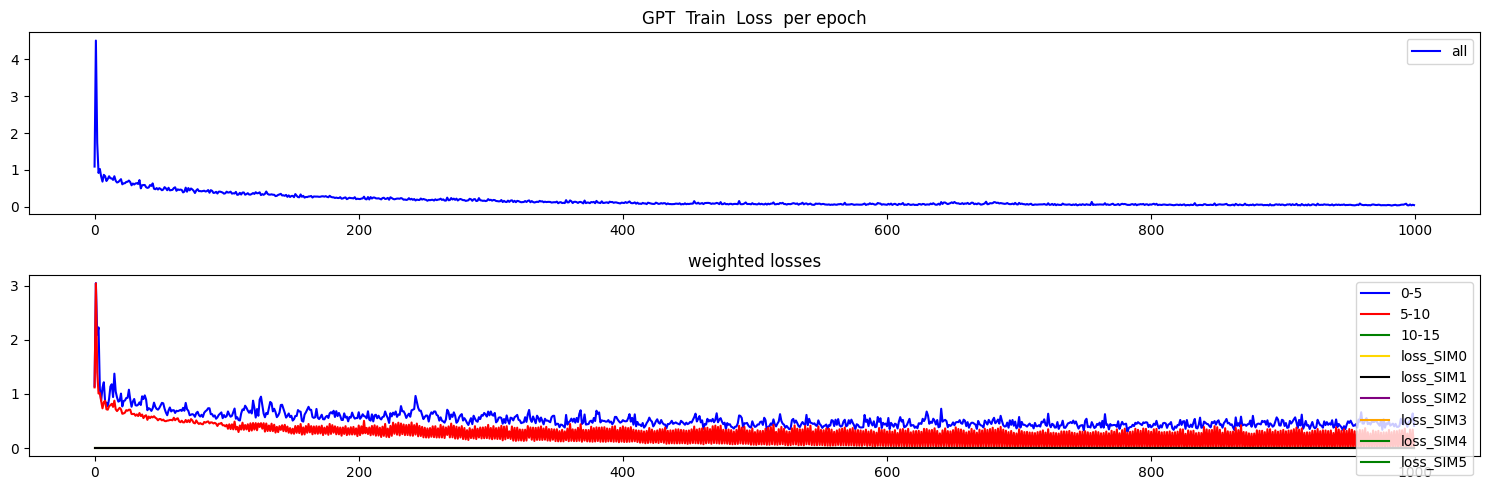

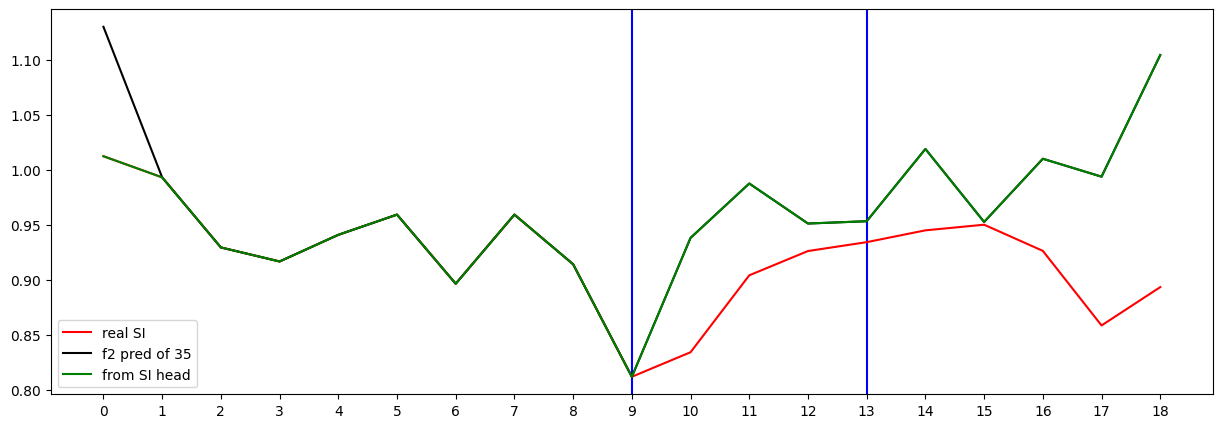

Testing R**2 - (all) - (no inputs):  0.932021867007893
Testing R**2 - (f2) - SI full (no inputs):  -2.592681447659065
Testing R**2 - SI head only (no inputs):  -2.592681447659065
0 ...index R**2 (no inputs):  -0.9267307129932105
1 ...index R**2 (no inputs):  -0.41193969665855024
2 ...index R**2 (no inputs):  -2.592681447659065
3 ...index R**2 (no inputs):  -1811.3461235338314
4 ...index R**2 (no inputs):  -109.14497397069054
5 ...index R**2 (no inputs):  -32.46844392639957
6 ...index R**2 (no inputs):  -15.515944305983457
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7383833275935836
10 ...index R**2 (no inputs):  -1.6519815248155947
11 ...index R**2 (no inputs):  -164.04991806228912
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.868472519097636
16 ...index R**2 (no inputs):  -0.4288758082847506
17 ...index R**2 (no inputs):  -201.4147348255

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.0336398827304325


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.28719628093700234


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -2.252927923769614


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -1.0107231438121032



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: 0.6033198872621862
Naive_R2:....................................R²: 0.8631
RMSE:0.2038,MAE:0.1570,MASE:0.2804
1 .......................R² on just step n - R²: 0.6033198872621862
Naive_R2:....................................R²: 0.8631
RMSE:0.2038,MAE:0.1570,MASE:0.2804
2 .....................R² on first n steps - R²: 0.49976972083788873
Naive_R2:....................................R²: 0.6366
RMSE:0.2141,MAE:0.1685,MASE:0.6335
2 .......................R² on just step n - R²: 0.3581188389987152
Naive_R2:....................................R²: 0.7524
RMSE:0.2239,MAE:0.1800,MASE:0.4753
3 .....................R² on first n steps - R²: 0.5333438193499254
Naive_R2:....................................R²: 0.6494
RMSE:0.1999,MAE:0.1584,MASE:0.6385
3 .......................R² on just step n - R²: 0.6164424071458238
Naive_R2:....................................R²: 0.8416
RMSE:0.1680,MAE:0.1383,MASE:0.3294
4 .....................R² on first n steps - 

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: 0.5108116732192312
Naive_R2:....................................R²: 0.8312
RMSE:0.2263,MAE:0.1879,MASE:0.3355
1 .......................R² on just step n - R²: 0.5108116732192312
Naive_R2:....................................R²: 0.8312
RMSE:0.2263,MAE:0.1879,MASE:0.3355
2 .....................R² on first n steps - R²: 0.4157767784263232
Naive_R2:....................................R²: 0.5756
RMSE:0.2314,MAE:0.1925,MASE:0.7238
2 .......................R² on just step n - R²: 0.2850747886035173
Naive_R2:....................................R²: 0.7243
RMSE:0.2363,MAE:0.1971,MASE:0.5206
3 .....................R² on first n steps - R²: 0.3610177459570182
Naive_R2:....................................R²: 0.5199
RMSE:0.2340,MAE:0.1943,MASE:0.7832
3 .......................R² on just step n - R²: 0.22404574817060208
Naive_R2:....................................R²: 0.6796
RMSE:0.2390,MAE:0.1979,MASE:0.4714
4 .....................R² on first n steps - 

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: 0.46536728422698603
Naive_R2:....................................R²: 0.8155
RMSE:0.2366,MAE:0.1756,MASE:0.3137
1 .......................R² on just step n - R²: 0.46536728422698603
Naive_R2:....................................R²: 0.8155
RMSE:0.2366,MAE:0.1756,MASE:0.3137
2 .....................R² on first n steps - R²: 0.11203006053789044
Naive_R2:....................................R²: 0.3549
RMSE:0.2853,MAE:0.2150,MASE:0.8084
2 .......................R² on just step n - R²: -0.3667374420186602
Naive_R2:....................................R²: 0.4728
RMSE:0.3267,MAE:0.2544,MASE:0.6717
3 .....................R² on first n steps - R²: 0.0028414226010102794
Naive_R2:....................................R²: 0.2508
RMSE:0.2923,MAE:0.2223,MASE:0.8959
3 .......................R² on just step n - R²: -0.26999389995999756
Naive_R2:....................................R²: 0.4756
RMSE:0.3058,MAE:0.2368,MASE:0.5641
4 .....................R² on first n 

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: 0.5645743705437027
Naive_R2:....................................R²: 0.8498
RMSE:0.2135,MAE:0.1659,MASE:0.2962
1 .......................R² on just step n - R²: 0.5645743705437027
Naive_R2:....................................R²: 0.8498
RMSE:0.2135,MAE:0.1659,MASE:0.2962
2 .....................R² on first n steps - R²: 0.401590049765292
Naive_R2:....................................R²: 0.5653
RMSE:0.2342,MAE:0.1934,MASE:0.7272
2 .......................R² on just step n - R²: 0.17969277736511113
Naive_R2:....................................R²: 0.6836
RMSE:0.2531,MAE:0.2209,MASE:0.5834
3 .....................R² on first n steps - R²: 0.44814284679003835
Naive_R2:....................................R²: 0.5854
RMSE:0.2174,MAE:0.1780,MASE:0.7173
3 .......................R² on just step n - R²: 0.5634625937126367
Naive_R2:....................................R²: 0.8197
RMSE:0.1793,MAE:0.1471,MASE:0.3504
4 .....................R² on first n steps - 


## Plot


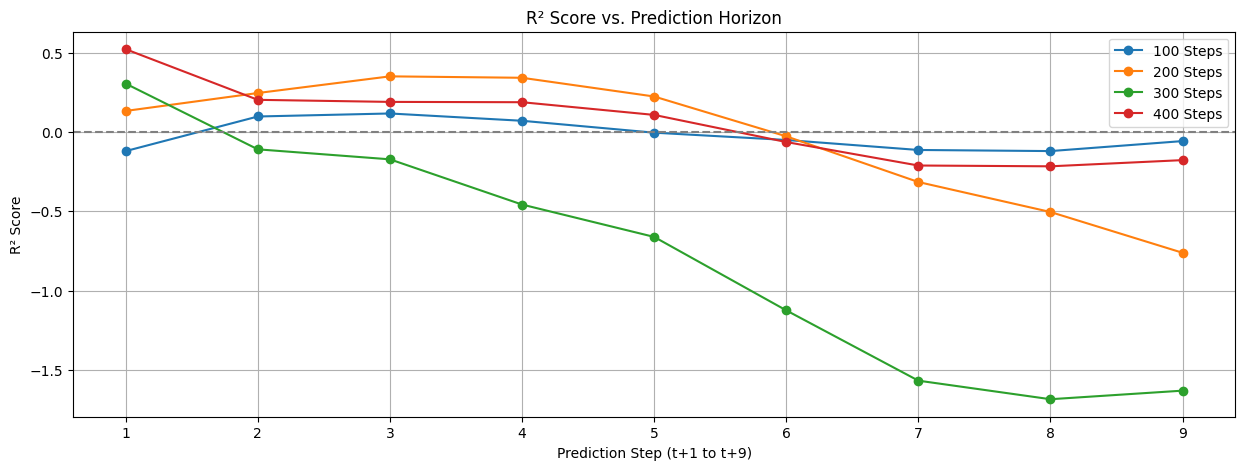

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
